# AI-Powered Customer Review Assistant Using (Chains) LangChain 🔗🔗 🤖 

## Introduction
This notebook demonstrates the use of `various chain mechanisms in LangChain` to manage and orchestrate complex workflows involving language models. The primary chain mechanisms covered include:  
  
- **LLMChain**: Basic chain for single LLM interactions
- **Sequential Chains**: Chains that pass intermediate results  
    - **SimpleSequentialChain**: Basic sequential execution  
    - **SequentialChain**: Advanced sequential execution   
- Router Chain


These chain mechanisms enable more effective and structured interactions with AI models by leveraging different chaining techniques. In this notebook, we will explore different types of chains and how they can be used to `build a customer review assistant`.However, while these chain mechanisms may resemble agents in a traditional sense, they do not align with LangChain's definition of an agent, which includes tools and decision-making capabilities. In fact, a `Retrieval-Augmented Generation (ReAct) Agent` integrates retrieval and generation within an agent framework, dynamically accessing relevant information to enhance responses. We will demonstrate how to `build a basic ReAct agent from scratch` using the OpenAI API, enabling it to process user inputs, perform predefined actions, and provide informed responses. We will demonstrate 1 how a structured approach using LangChain can create an AI-Powered Customer Review Assistant`. This assistant will be capable of understanding customer feedback, translating it for broader accessibility, summarizing key points for quick reference, and providing professional and empathetic responses to maintain customer relationships

### Data Loading and Display:
More information about the dataset on [Amazon Reviews Multi](https://www.kaggle.com/datasets/mexwell/amazon-reviews-multi) and  on the pubblication of [Phillip Keung, Yichao Lu, György Szarvas and Noah A. Smith. “The Multilingual Amazon Reviews Corpus.” In Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing, 2020](https://aclanthology.org/2020.emnlp-main.369/).

For the purpose of this project, the original dataset has been resized, for more information see the [Setup Instructions](SETUP.md) file

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import json
from tabulate import tabulate

In [2]:
#Load the dataset from the CSV file
df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

In [3]:
# Display first five rows
#print(df.head())

# Display all the rows
df

,language,product_category,review_title,review_body,stars,count
0,de,kitchen,Defekt,Gerät kam defekt an. Der Display zeigte zwar a...,1,1
1,de,pet_products,Leider nichts fpr mein OEB,Nach nicht mal 30 Sekunden hat mein Hund diese...,1,1
2,de,kitchen,Naja,"Für sandwiches, burger Patty's ist er ganz OK ...",2,1
3,de,shoes,Schlechte Qualität,"Innensohle löste sich nach ca.4 Wochen auf, Kl...",2,1
4,de,home_improvement,Verpackung,"Der Akku ist halt ein Original, also nichts zu...",3,1
5,de,pet_products,Könnte der verschluss besser sein,Ist nicht so gut weil der Kot am Hintern klebt,3,1
6,de,home_improvement,"klebt nicht so fest, wie erwartet","das Isolierband klebt nicht so fest, wie ich e...",4,1
7,de,pet_products,Es scheint....,geschmeckt zu haben. :),4,1
8,de,jewelry,Attraktives Freundschaftsband mit coolem Logo,Schönes Teil mit gutem Preis-/Leistungsverhält...,5,1
9,de,pet_products,Gute Geschenk idee,"Meine freundin hat sich sehr gefreut, tolles P...",5,1


- Explore a selected row of the dataset / # Example review data

In [4]:
#Explore a selected row of the dataset 
#print(df.iloc[11])
#df.iloc[11][['review_title', 'review_body']]
#import json
print(json.dumps(df.iloc[11].to_dict(), indent=4))

{
    "language": "en",
    "product_category": "pc",
    "review_title": "Not Working after 3 months",
    "review_body": "Purchases this for my husband and after 3 months it just stopped working will no longer turn on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb ahold of someone for a replacement.",
    "stars": 1,
    "count": 1
}


**Explanation output** The above output givesinformation about the language, product_category, review_title, review_body, and start for a selected item enclosed in the dataset. In details, the given review is for a product in the "pc" category and is written in English. The review title is "Not Working after 3 months". The review body describes the product stopping to work after 3 months and the difficulty in contacting support for a replacement despite a 1-year warranty. The review has a rating of 1 star and is counted as 1 review.

In [5]:
# Inspection variable language
print(df["language"].value_counts())
print(" The number of the different language is {}".format(df["language"].nunique())) 

language
de    10
en    10
es    10
fr    10
Name: count, dtype: int64
 The number of the different language is 4


In [6]:
# Inspection variable product_category
print(df["product_category"].value_counts())
print(" The number of the different product_category is {}".format(df["product_category"].nunique()))

#print(df["product_category"].unique())

product_category
kitchen                8
pet_products           7
sports                 6
industrial_supplies    4
shoes                  3
home_improvement       3
jewelry                2
pc                     2
other                  2
lawn_and_garden        2
home                   1
Name: count, dtype: int64
 The number of the different product_category is 11


In [7]:
# Group by language and product_category, then count occurrences of each star rating
star_counts_by_category = (
    df.groupby(["language", "product_category"])["stars"]
    .value_counts()
    .sort_index()  # Ensures the output is sorted by stars
)

# Print the result
#print(star_counts_by_category)
#from tabulate import tabulate

# Convert to DataFrame and format output as a table
star_counts_df = star_counts_by_category.reset_index(name="count")
print(tabulate(star_counts_df, headers="keys", tablefmt="pretty"))

+----+----------+---------------------+-------+-------+
|    | language |  product_category   | stars | count |
+----+----------+---------------------+-------+-------+
| 0  |    de    |  home_improvement   |   3   |   1   |
| 1  |    de    |  home_improvement   |   4   |   1   |
| 2  |    de    |       jewelry       |   5   |   1   |
| 3  |    de    |       kitchen       |   1   |   1   |
| 4  |    de    |       kitchen       |   2   |   1   |
| 5  |    de    |    pet_products     |   1   |   1   |
| 6  |    de    |    pet_products     |   3   |   1   |
| 7  |    de    |    pet_products     |   4   |   1   |
| 8  |    de    |    pet_products     |   5   |   1   |
| 9  |    de    |        shoes        |   2   |   1   |
| 10 |    en    |        home         |   2   |   1   |
| 11 |    en    |  home_improvement   |   4   |   1   |
| 12 |    en    | industrial_supplies |   1   |   1   |
| 13 |    en    | industrial_supplies |   3   |   1   |
| 14 |    en    | industrial_supplies |   5   | 

### Setup and Imports

In [ ]:
#%pip install rich

In [8]:
# Import required libraries for data processing and environment management
import warnings
import os
import datetime
import pandas as pd  # commonly used for data manipulation and analysis
from rich import print  # helps to improve the readability of nested dictionary outputs
from rich.pretty import Pretty
from dotenv import load_dotenv, find_dotenv

# Suppress warnings
warnings.filterwarnings('ignore')

# Import LangChain-related libraries
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain, SequentialChain, ConversationChain 
from langchain.memory import ConversationBufferMemory, ConversationSummaryMemory
from langchain.chat_models import ChatOpenAI
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from graphviz import Digraph
from IPython.display import display
from tabulate import tabulate

# Load environment variables from a .env file
_ = load_dotenv(find_dotenv())  # read local .env file

### Set up LLM Model 

In [9]:
#Set the model to "gpt-4"
#llm_model = "gpt-4"  #Set the model to "gpt-4" in the final version
llm_model = "gpt-3.5-turbo" # Adjust the model name if necessary

### LLMChain Examples

This section demonstrates how to use the `LLMChain` to manage a single language model prompt and response

#### Use Case
Basic text generation using a language model.

#### How It Works
Takes an input, formats it with a prompt template, and passes it to an LLM.

**Note**: This setup is commonly used to build AI-powered applications that generate responses based on structured prompts. This setup consists of importing key LangChain components for working with LLMs:

- **ChatOpenAI**: A wrapper for interacting with OpenAI's chat models (e.g., GPT-4, GPT-3.5). It allows you to send prompts and receive responses in a structured way.
- **ChatPromptTemplate**: A utility for creating structured prompts for LLMs. It helps structure prompts with placeholders for dynamic inputs and ensures consistency and allows easy customization.
- **LLMChain**: A chain that links a prompt template to an LLM, enabling automated text generation. It combines a ChatOpenAI model with a ChatPromptTemplate to create a workflow. It automates text generation based on structured prompts.

##### Example 1

This example demonstrates how to `Summarize Reviews by Category`, thus how to generate summaries for each product category by summarizing all the reviews. This prompt would aggregate all reviews for a product category and provide a summary, helping to understand the general sentiment or key points for that category.

- product_category = "home"

In [10]:
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset


# Step 2: Filter reviews based on a specific product category (example: "home")
product_category = "home"
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category."
)

# Step 6: Create an LLMChain
#chain = LLMChain(prompt=prompt, llm=llm)
chain = prompt | llm   #LLMChain automatically formats the prompt and sends it to the LLM.

# Step 7: Use .invoke() to get the response
response = chain.invoke({"product_category": product_category,})

# Step 8: Print the response (corrected)
print(response)  # This will directly print the result returned by the model


AIMessage(
    content='Overall, the feedback for the home product category is negative due to shedding issues mentioned in 
the reviews.',
    additional_kwargs={'refusal': None},
    response_metadata={
        'token_usage': {
            'completion_tokens': 21,
            'prompt_tokens': 56,
            'total_tokens': 77,
            'completion_tokens_details': {
                'accepted_prediction_tokens': 0,
                'audio_tokens': 0,
                'reasoning_tokens': 0,
                'rejected_prediction_tokens': 0
            },
            'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}
        },
        'model_name': 'gpt-3.5-turbo-0125',
        'system_fingerprint': None,
        'finish_reason': 'stop',
        'logprobs': None
    },
    id='run-45ef928d-f054-4d57-8416-b1004b7cbd81-0',
    usage_metadata={
        'input_tokens': 56,
        'output_tokens': 21,
        'total_tokens': 77,
        'input_token_details': {'audio': 0, 'cache_read': 0},
        'output_token_details': {'audio': 0, 'reasoning': 0}
    }
)

**Explanation of Output**: The above structured output provides comprehensive information about the AI message generated, including the content, metadata about the tokens used, and model details.

- **Content**: The main message content is likely a response generated by an AI model.
- **Additional Keywords**: An additional keyword, refusal, is set to None, indicating there was no refusal or rejection in this context.
- **Response Metadata**: This section provides detailed metadata about the response, including token usage and model information.

In [11]:
# Extract and print the content of the response
response_content = response.content
print(response_content)

Overall, the feedback for the home product category is negative due to shedding issues mentioned in the reviews.

**Explanation output** The above output shows only the content of the given prompt . Besides, the output ssems in aggrement with the rating of this product_category (2)

product_category = "industrial_supplies"

In [12]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
#df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

# Step 2: Filter reviews based on a specific product category (example: "home")
product_category = "industrial_supplies"
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category.")

# Step 6: Create an LLMChain
chain = prompt | llm   #LLMChain automatically formats the prompt and sends it to the LLM.

# Step 7: Use .invoke() to get the response
response = chain.invoke({"product_category": product_category,})

# Step 8: Print the response the result returned by the model
# print(response)  

# Extract and print the content of the response
response_content = response.content
print(response_content)

Overall, the reviews for industrial supplies were mixed. Some customers experienced issues such as receiving a 
small belt that caused problems with their mower, difficulties with initial setup and connectivity, and unnecessary
sticky labels on products. However, there were also positive comments about the functionality and effectiveness of 
the products, such as a shade providing ample coverage and a unit showing good accuracy and stability.

**Explanation output** The above output shows only the content of the given prompt and its content seems in aggrement with the rating of this product category (1,3,5 stars)

product_category= "kitchen"

In [13]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
#df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

# Step 2: Filter reviews based on a specific product category (example: "home")
product_category = "kitchens"
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category."
)

# Step 6: Create an LLMChain
#chain = LLMChain(prompt=prompt, llm=llm)

chain = prompt | llm   #LLMChain automatically formats the prompt and sends it to the LLM.

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
})

# Step 8: Print the response (corrected)
#print(response)  # This will directly print the result returned by the model

# Extract and print the content of the response
response_content = response.content
print(response_content)


Overall, the reviews for kitchens seem to be largely positive. Customers are pleased with the quality and 
functionality of the kitchens they purchased. Some reviewers mention the stylish design and durability of the 
products, while others appreciate the ease of installation and organization options. A few negative reviews mention
issues with missing parts or damaged items upon delivery, but these seem to be isolated incidents. Overall, 
customers are satisfied with their kitchen purchases.

**Explanation output** The above output shows only the content of the given prompt . Besides, the output ssems in aggrement with the rating of this product_category (1,2,3,4,5).

##### Example 2

This example demonstrates how to `Identifying Common Themes or Keywords in Reviews`, thus how to identify recurring themes or keywords within reviews of a specific category or language. This prompt will extract common themes or keywords that can be useful for product improvement or marketing strategies.

- product_category = "pet_products" and language="de"

In [14]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
#df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

# Step 2: Filter reviews based on a specific product category (example: "home") and language
product_category = "pet_products"
language="de"

category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for identifying themes or keywords
prompt = ChatPromptTemplate.from_template(
    f"Identify the most common themes or keywords in the reviews for the product category '{product_category}' in the '{language}' language. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)

# Step 6: Create an LLMChain
chain = LLMChain(prompt=prompt, llm=llm)

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
    "language": language,
})

# Step 8: Print the response (themes/keywords)
print(response)  # This will directly print the result returned by the model


C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\3221769254.py:37: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=llm)


{
    'product_category': 'pet_products',
    'language': 'de',
    'text': '1. Hund (dog)\n2. Futter (food)\n3. Produkt (product)\n4. Geschenk (gift)\n5. Freundin (friend)'
}

**Explation output** As it can been shown from the output, the given prompt extracts common themes or keywords that can be useful for product improvement or marketing strategies in the product category 'pet_products' for german reviews. 

- product_category = "pc" and language="en"

In [15]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
#df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

# Step 2: Filter reviews based on a specific product category (example: "home") and language
product_category = "pc"
language = "en" # Adjust language as needed

category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for identifying themes or keywords
prompt = ChatPromptTemplate.from_template(
    f"Identify the most common themes or keywords in the reviews for the product category '{product_category}' in the '{language}' language. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)

# Step 6: Create an LLMChain
chain = LLMChain(prompt=prompt, llm=llm)

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
    "language": language,
})

# Step 8: Print the response (themes/keywords)
print(response)  # This will directly print the result returned by the model

{
    'product_category': 'pc',
    'language': 'en',
    'text': '1. Not working\n2. Warranty\n3. Contact support\n4. Refund\n5. Design'
}

**Explation output** As it can been shown from the output, the given prompt extracts common themes or keywords that can be useful for product improvement or marketing strategies in the product category 'pc' for english reviews. 

##### Example 3

This example demonstrates how to `Review Title and Body Rewriting` to rephrase or rewrite review titles and bodies for better clarity or to remove any inappropriate content. This could be useful for moderating or improving the language of customer reviews.

In [16]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
#df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset
# Step 2: Filter reviews based on a specific product category (example: "home") and language
product_category = "pc"
language = "en"   # Adjust language as needed
category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for rewriting reviews with clarity
if review_titles and review_bodies:
    prompt = ChatPromptTemplate.from_template(
        f"Rewrite the following review for better clarity while keeping the original sentiment. "
        f"The review title is '{review_titles[0]}' and the review body is '{review_bodies[0]}'.\n\n"
        f"Repeat the same process for the following reviews:\n"
        f"{review_text}"
    )

    # Step 6: Create an LLMChain
    chain = LLMChain(prompt=prompt, llm=llm)

    # Step 7: Use .invoke() to get the response
    response = chain.invoke({
        "product_category": product_category,
        "language": language,
    })

    # Step 8: Print the response (rewritten reviews)
    print(response)  # This will directly print the rewritten reviews returned by the model
else:
    print("No reviews found for the specified product category and language.")


{
    'product_category': 'pc',
    'language': 'en',
    'text': "Title: 'Product Malfunction after 3 Months'\n\nBody: I bought this item for my husband, but after only
3 months it stopped working completely. Despite being covered by a 1-year warranty, I have been struggling to get 
in touch with customer support for a replacement. It has been very frustrating trying to resolve this issue. 
\n\nTitle: 'Disappointment, Where's my Refund?'\n\nBody: While I initially loved the packaging and design of this 
product, it has failed to function as promised. It has been a major letdown, and the only use I have found for it 
is holding my phone during movie watching. I am seriously considering seeking a refund as it has not lived up to my
expectations."
}

### Sequential Chains Examples

Sequential chains are useful when multiple steps need to be executed in a sequence.

#### Types of Sequential Chains
- **SimpleSequentialChain**: Passes output from one chain as input to the next.
- **SequentialChain**: Allows multiple inputs and outputs.

#### SimpleSequentialChain

This section demonstrates how to use `SimpleSequentialChain` to execute a sequence of chains in a simple linear fashion.

**How It Works**:
- The first chain generates a one-sentence description of the given topic.
- The second chain expands on that description.
- The final response is a more detailed explanation of the topic.

This is useful when breaking down complex tasks into smaller steps.

**Note**: The `SimpleSequentialChain` from LangChain is used to execute a sequence of LLM chains where the output of one chain is automatically passed as input to the next. The purpose of using this chain is to simplify the process of chaining multiple LLMs in a linear sequence.

##### Example 1 Summarizing Reviews, Then Extracting Sentiment

This example demonstrates an use case how to create a `SimpleSequentialChain`  that first, summarizes a review, then extracts its sentiment.summarises reviews, and then extract Sentimet


In [17]:
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Provide a concise summary.")

sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?")

# Initialize LLM
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for summarization and sentiment analysis
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")

# Create the sequential chain
chain = SequentialChain(chains=[summarization_chain, sentiment_chain], verbose=True, input_variables=["review_title", "review_body"], 
output_variables=["summary", "sentiment"])

# Run the chain with review_data from DataFrame row 11
response = chain.invoke(review_data)

# Print output
print(response)




> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Not Working after 3 months',
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'summary': 'The reviewer purchased the product for their husband, but it stopped working after 3 months and 
they have been unable to get a replacement despite it having a 1-year warranty.',
    'sentiment': 'Negative'
}

**Explanation of Output**: The above output is the result of a process involving a `SimpleSequentialChain` in a language model. The output log shows the start and end of a sequential chain process, with intermediate steps and final outputs.

**Graphical Representation**: The best graphical representation for this example is a flowchart or directed graph, where each step represents a transformation of the input as it moves through the chain.


**Diagram Structure**:
- Input (Review text)
- Chain 1: Summarize the review text
- Chain 2: Extract the sentiment from the summarized review
- Final Output (Sentiment Description)

Below is a Python snippet to create this flowchart using Graphviz:

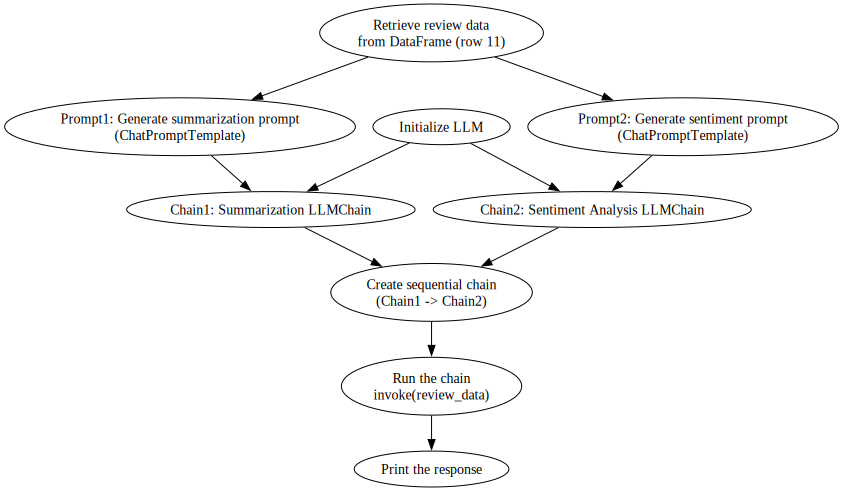

'Visualization_graphs\\SimpleSequntialChain_flowchart_1.png'

In [20]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph(format="png")

# Define nodes
dot.node("A", "Retrieve review data\nfrom DataFrame (row 11)")
dot.node("B", "Prompt1: Generate summarization prompt\n(ChatPromptTemplate)")
dot.node("C", "Prompt2: Generate sentiment prompt\n(ChatPromptTemplate)")
dot.node("D", "Initialize LLM ")
dot.node("E", "Chain1: Summarization LLMChain")
dot.node("F", "Chain2: Sentiment Analysis LLMChain")
dot.node("G", "Create sequential chain\n(Chain1 -> Chain2)")
dot.node("H", "Run the chain\ninvoke(review_data)")
dot.node("I", "Print the response")

# Define edges (connections)
dot.edge("A", "B")  # Review data -> Summarization prompt
dot.edge("A", "C")  # Review data -> Sentiment prompt
dot.edge("B", "E")  # Summarization prompt -> Summarization Chain
dot.edge("C", "F")  # Sentiment prompt -> Sentiment Chain
dot.edge("D", "E")  # LLM -> Summarization Chain
dot.edge("D", "F")  # LLM -> Sentiment Chain
dot.edge("E", "G")  # Chain1 -> Sequential Chain
dot.edge("F", "G")  # Chain2 -> Sequential Chain
dot.edge("G", "H")  # Sequential Chain -> Invoke process
dot.edge("H", "I")  # Output result

# Render the graph
#dot.render("review_analysis_flowchart", view=True)
display(dot)

# Ensure the output directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save and view the graph
dot.render(os.path.join(output_dir, "SimpleSequntialChain_flowchart_1"), format="png", view=True)

- Semplified visualisation of the SimpleSequentialChain_flowchart_1

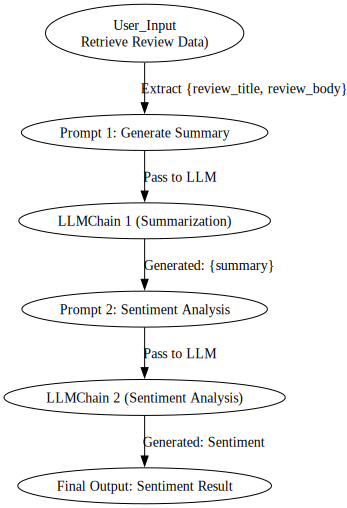

'Visualization_graphs\\SimpleSequentialChain_flowchart_2.png'

In [21]:
#from graphviz import Digraph
#import os

def visualize_review_analysis_chain():
    dot = Digraph("ReviewAnalysisChain")
    
    # Nodes
    dot.node("A", "User_Input\nRetrieve Review Data)")
    dot.node("B", "Prompt 1: Generate Summary")
    dot.node("C", "LLMChain 1 (Summarization)")
    dot.node("D", "Prompt 2: Sentiment Analysis")
    dot.node("E", "LLMChain 2 (Sentiment Analysis)")
    dot.node("F", "Final Output: Sentiment Result")
    
    # Edges
    dot.edge("A", "B", label="Extract {review_title, review_body}")
    dot.edge("B", "C", label="Pass to LLM")
    dot.edge("C", "D", label="Generated: {summary}")
    dot.edge("D", "E", label="Pass to LLM")
    dot.edge("E", "F", label="Generated: Sentiment")
    
    return dot

# Generate and render the graph
dot = visualize_review_analysis_chain()

# Display in Jupyter Notebook
display(dot)

# Ensure the output directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save and view the graph
dot.render(os.path.join(output_dir, "SimpleSequentialChain_flowchart_2"), format="png", view=True)

**Explanation graph**: The meaning of the `SimpleSequentialChain` in LangChain matches the visual representation in the image. The image effectively captures the idea of passing outputs from one step to another in a sequential manner. In this selected example the flowchart illustrates how the product input flows through the two LLM chains before producing the final sentiment result.

#### SequentialChain

This section demonstrates how to use SequentialChain to manage more complex workflows with multiple chained operations.

**Use Case**: When multiple steps need to be executed in a sequence with multiple inputs and outputs.

**Note** The `SequentialChain` ifrom LangChain is a more flexible version of `SimpleSequentialChain`, allowing multiple inputs and outputs across multiple LLMChains.Its purpose is to chain multiple LLMChain instances with distinct inputs/outputs and unlike SimpleSequentialChain, it allows passing different variables between steps instead of just a single output.This is useful when working with multiple intermediate outputs that are needed for later steps. 

- Example 1  
 This example demonstrates how to create a `SequentialChain` that involves multiple steps with multiple inputs and outputs. In details, this example shows an use case that creates `a SequentialChain to be used in Summarizing Reviews → Extracting Sentiment → Assigning Star Ratings`.  

 **How It Works**: 
- The first chain generates a summary based on a product review.
- The second chain analyzes the sentiment of the summarized review.
- The third chain predicts the star rating based on the sentiment.

In [22]:
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

#Prompt 1: Summarization Step
summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review in one sentence:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Summary:"
)

#Prompt 2: Sentiment Analysis Step
sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?"
)

#Prompt 3: Star Rating Prediction Step
rating_prompt = ChatPromptTemplate.from_template(
    "Based on the following sentiment: {sentiment}, predict a star rating (1 to 5) for the product."
)


#from langchain.chains import SequentialChain
#from langchain_openai import ChatOpenAI
#from langchain.chains import LLMChain

# Initialize the Language Model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for each step
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")
rating_chain = LLMChain(prompt=rating_prompt, llm=llm, output_key="predicted_stars")

# Create the Sequential Chain
chain = SequentialChain(
    chains=[summarization_chain, sentiment_chain, rating_chain],
    input_variables=["review_title", "review_body"],
    output_variables=["summary", "sentiment", "predicted_stars"],
    verbose=True
)

# Run the chain
response = chain.invoke(review_data)

# Print Output
print(response)




> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Not Working after 3 months',
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'summary': 'Product stopped working after 3 months, unable to contact support for replacement despite having 1 
year warranty.',
    'sentiment': 'Negative',
    'predicted_stars': '2 star rating'
}

- Example - changing the review data

In [23]:
# Example review data

review_data = {
    "review_title": df.iloc[18]['review_title'],
    "review_body": df.iloc[18]['review_body']
}

#Prompt 1: Summarization Step
summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review in one sentence:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Summary:"
)

#Prompt 2: Sentiment Analysis Step
sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?"
)

#Prompt 3: Star Rating Prediction Step
rating_prompt = ChatPromptTemplate.from_template(
    "Based on the following sentiment: {sentiment}, predict a star rating (1 to 5) for the product."
)


#from langchain.chains import SequentialChain
#from langchain_openai import ChatOpenAI
#from langchain.chains import LLMChain

# Initialize the Language Model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for each step
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")
rating_chain = LLMChain(prompt=rating_prompt, llm=llm, output_key="predicted_stars")

# Create the Sequential Chain
chain = SequentialChain(
    chains=[summarization_chain, sentiment_chain, rating_chain],
    input_variables=["review_title", "review_body"],
    output_variables=["summary", "sentiment", "predicted_stars"],
    verbose=True
)


# Run the chain
response = chain.invoke(review_data)

# Print Output
print(response)




> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Had to use a piece of Velcro on my hard hat and the shade because it kept wanting to spin 
around when I worked but other than th',
    'review_body': "Purchased the blue color... It's very big but provides a lot of shade. It doesn't touch my neck
or get in the way when I work. Had to use a piece of Velcro on my hard hat and the shade because it kept wanting to
spin around when I worked but other than that I love it.",
    'summary': 'The reviewer found the blue shade to be large and effective at providing shade, but had to use 
Velcro to prevent it from spinning around on their hard hat.',
    'sentiment': 'Positive',
    'predicted_stars': 'Based on the positive sentiment, I predict a star rating of 5 for the product.'
}

- Example 2  
 This example demonstrates how to create a `SequentialChain` that involves multiple steps with multiple inputs and outputs. In details, this example shows an use case that creates `a SequentialChain to be used in Summarizing Reviews by Product Category`.    

 **How It Works**: 
- The first chain collects multiple reviews from the dataset for a specific product category.  
- The second chain summarizes all the reviews for that category into a few key points.  

In [24]:
collection_prompt = ChatPromptTemplate.from_template(
    "Here are multiple reviews for the product category '{product_category}':\n\n"
    "{reviews}\n\n"
    "Summarize the key points from these reviews."
)
# Load dataset
#import pandas as pd

#df = pd.read_csv('Resized_dataset.csv') 

# Filter reviews for a specific category
product_category = "home"
category_reviews = df[df["product_category"] == product_category][["review_title", "review_body"]].head(5)

# Format reviews as a string
reviews_text = "\n".join(
    [f"- Title: {row['review_title']}, Body: {row['review_body']}" for _, row in category_reviews.iterrows()]
)

# Create LLMChains
collection_chain = LLMChain(prompt=collection_prompt, llm=llm, output_key="category_summary")

# Create Sequential Chain
chain = SequentialChain(
    chains=[collection_chain],
    input_variables=["product_category", "reviews"],
    output_variables=["category_summary"],
    verbose=True
)

# Run the chain
response = chain.invoke({"product_category": product_category, "reviews": reviews_text})

# Print Output
print(response)




> Entering new SequentialChain chain...

> Finished chain.


{
    'product_category': 'home',
    'reviews': '- Title: Two Stars, Body: These shed too much.',
    'category_summary': 'The key point from these reviews is that the product sheds too much.'
}

- Example - changing the product category.

In [25]:
# Filter reviews for a specific category
product_category = "pet_products"
category_reviews = df[df["product_category"] == product_category][["review_title", "review_body"]].head(5)

# Format reviews as a string
reviews_text = "\n".join(
    [f"- Title: {row['review_title']}, Body: {row['review_body']}" for _, row in category_reviews.iterrows()]
)

# Create LLMChains
collection_chain = LLMChain(prompt=collection_prompt, llm=llm, output_key="category_summary")

# Create Sequential Chain
chain = SequentialChain(
    chains=[collection_chain],
    input_variables=["product_category", "reviews"],
    output_variables=["category_summary"],
    verbose=True
)

# Run the chain
response = chain.invoke({"product_category": product_category, "reviews": reviews_text})

# Print Output
print(response)




> Entering new SequentialChain chain...

> Finished chain.


{
    'product_category': 'pet_products',
    'reviews': '- Title: Leider nichts fpr mein OEB, Body: Nach nicht mal 30 Sekunden hat mein Hund diese 
umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.\n- Title: Könnte der 
verschluss besser sein, Body: Ist nicht so gut weil der Kot am Hintern klebt\n- Title: Es scheint...., Body: 
geschmeckt zu haben. :)\n- Title: Gute Geschenk idee, Body: Meine freundin hat sich sehr gefreut, tolles Produkt\n-
Title: Precio, Body: Ahorro con respecto al precio en tiendas',
    'category_summary': "- One reviewer's dog easily knocked over the product and spilled the food everywhere, 
leading them to not recommend it for their specific breed of dog.\n- Another reviewer mentioned that the closure 
could be improved as feces stuck to the pet's hind end.\n- One reviewer indicated that their pet enjoyed the 
product.\n- The product was seen as a good gift idea, with the recipient being very happy with it.\n- One reviewer 
mentioned saving money compared to store prices."
}

**Graphical Representation**: The best graphical representation for this example is a flowchart or directed graph, where each step represents a transformation of the input as it moves through the chain. 

**Diagram Structure**:
- Input (Product Category)
- Chain 1: Summarize Reviews
- Chain 2: Generates Key Summary Points
- Final Output (Product Category Name, Collect Reviews, Filtered by Category, Key Summary Points)


Below is a Python snippet to create this flowchart using Graphviz:

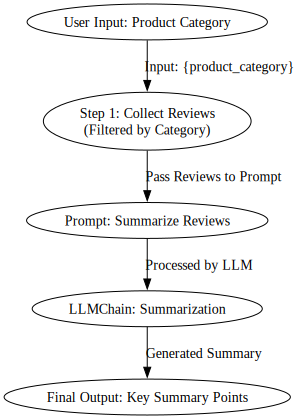

'Visualization_graphs\\SequentialChain_flowchart_1.png'

In [26]:
#from graphviz import Digraph
#import os

def visualize_review_summary_chain():
    dot = Digraph("ReviewSummaryChain")
    
    # Nodes
    dot.node("A", "User Input: Product Category")
    dot.node("B", "Step 1: Collect Reviews\n(Filtered by Category)")
    dot.node("C", "Prompt: Summarize Reviews")
    dot.node("D", "LLMChain: Summarization")
    dot.node("E", "Final Output: Key Summary Points")
    
    # Edges
    dot.edge("A", "B", label="Input: {product_category}")
    dot.edge("B", "C", label="Pass Reviews to Prompt")
    dot.edge("C", "D", label="Processed by LLM")
    dot.edge("D", "E", label="Generated Summary")

    return dot

# Generate and display the graph
dot = visualize_review_summary_chain()
#dot.render("review_summary_chain", format="png", view=True)
display(dot)
# Ensure the directory exists
#output_dir = "Visualization_graphs"
#os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "SequentialChain_flowchart_1"), format="png", view=True)


### Router Chain

Router chains in LangChain enable dynamic routing of inputs to different chains based on specific conditions. This is useful for orchestrating complex workflows where different inputs need to be processed by different chains.

#### Types of Router Chains
- **LLMRouterChain**: Routes inputs to different chains based on conditions specified in the prompt.
- **MultiPromptChain**: Routes inputs to different prompts and chains based on specified conditions.

#### LLMRouterChain Example

This example demonstrates how to use `LLMRouterChain` to dynamically route inputs to different chains based on specific conditions.

**Use Case**: When different inputs need to be processed by different chains based on specified conditions.

**How It Works**:
- The router chain uses a prompt to evaluate the input and determine the appropriate chain.
- The selected chain processes the input and returns the response.

- Example 1 (useful to get an insight also in the sentiment analysis)
This example demonstrates how to use `LLMRouterChain` to summarize a selected review, determine the sentiment of summary, and write a polite and professional response based on the sentiment review.

In [27]:
# Import LangChain-related libraries
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Extract key points
extract_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Summarize this review: {review_body}"), output_key="summary")

# Sentiment Analysis
sentiment_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Determine the sentiment of this text: {summary}"), output_key="sentiment")

# Generate a response
response_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Write a polite and professional response to a {sentiment} review: {summary}"), output_key="output")

# Chain them together
review_assistant = SequentialChain(chains=[extract_chain, sentiment_chain, response_chain], input_variables=["review_body"], output_variables=["output"])

# Execute the chain with a selected review
review_text = df.iloc[11]['review_body']
print(review_assistant.invoke({"review_body": review_text}))


{
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'output': 'Dear [Reviewer],\n\nWe are sincerely sorry to hear about the issues you have encountered with the 
item purchased for your husband. We apologize for any inconvenience this has caused.\n\nWe take customer 
satisfaction very seriously and want to ensure that you receive the assistance you need in resolving this matter. 
Please provide us with your contact information and order details so that we can investigate the issue further and 
assist you with obtaining a replacement under the 1-year warranty.\n\nWe strive to provide excellent customer 
service and will do our best to address your concerns promptly. Thank you for bringing this to our attention and 
giving us the opportunity to make things right.\n\nBest regards,\n[Your Name]\nCustomer Service Team'
}

**Explanation output** The above output contains information both on the _customer's review of a product _ and the more appropiate response to that review_

Below is a Python snippet to create the flowchart using Graphviz of _LLMRouterChain for the above example.

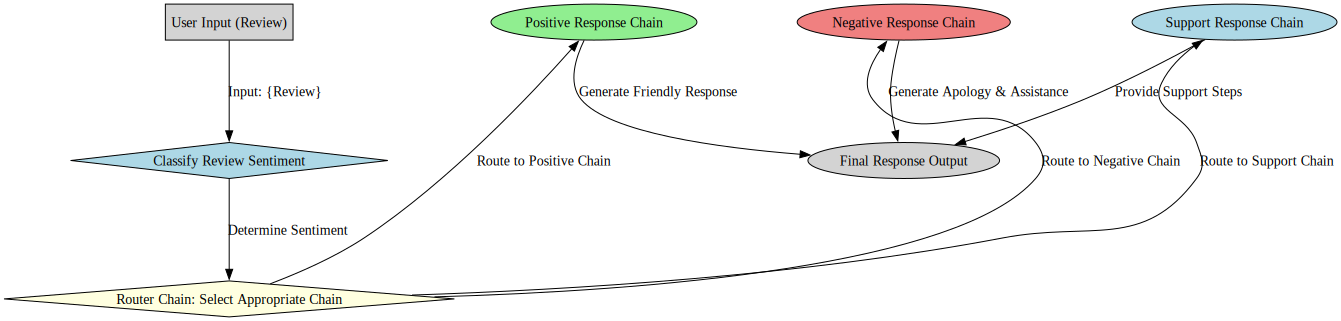

'Visualization_graphs\\LLMRouterChain_flowchart_1.png'

In [28]:
#from graphviz import Digraph

def visualize_multi_prompt_chain():
    dot = Digraph("MultiPromptChain")

    # Set global graph attributes
    dot.attr(rankdir="TB", ranksep="1.2", nodesep="1.0")  # Increase spacing

    # Define Nodes with different shapes
    dot.node("A", "User Input (Review)", shape="box", style="filled", fillcolor="lightgrey")
    dot.node("B", "Classify Review Sentiment", shape="diamond", style="filled", fillcolor="lightblue")
    dot.node("C", "Router Chain: Select Appropriate Chain", shape="diamond", style="filled", fillcolor="lightyellow")
    
    # Response Chains
    dot.node("D1", "Positive Response Chain", shape="ellipse", style="filled", fillcolor="lightgreen")
    dot.node("D2", "Negative Response Chain", shape="ellipse", style="filled", fillcolor="lightcoral")
    dot.node("D3", "Support Response Chain", shape="ellipse", style="filled", fillcolor="lightblue")

    # Final Output Node
    dot.node("E", "Final Response Output", shape="ellipse", style="filled", fillcolor="lightgrey")

    # Define Edges with labels
    dot.edge("A", "B", label="Input: {Review}")
    dot.edge("B", "C", label="Determine Sentiment")
    
    dot.edge("C", "D1", label="Route to Positive Chain", constraint="false")
    dot.edge("C", "D2", label="Route to Negative Chain", constraint="false")
    dot.edge("C", "D3", label="Route to Support Chain", constraint="false")

    dot.edge("D1", "E", label="Generate Friendly Response")
    dot.edge("D2", "E", label="Generate Apology & Assistance")
    dot.edge("D3", "E", label="Provide Support Steps")

    return dot

# Generate and render the flowchart
dot = visualize_multi_prompt_chain()
display(dot)
#dot.render("multi_prompt_chain", format="png", view=True)


# Ensure the directory exists
#output_dir = "Visualization_graphs"
#os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "LLMRouterChain_flowchart_1"), format="png", view=True)


Below is a Python snippet to create a simplyfied flowchart of LLMRouterChain_flowchart_1 using Graphviz 

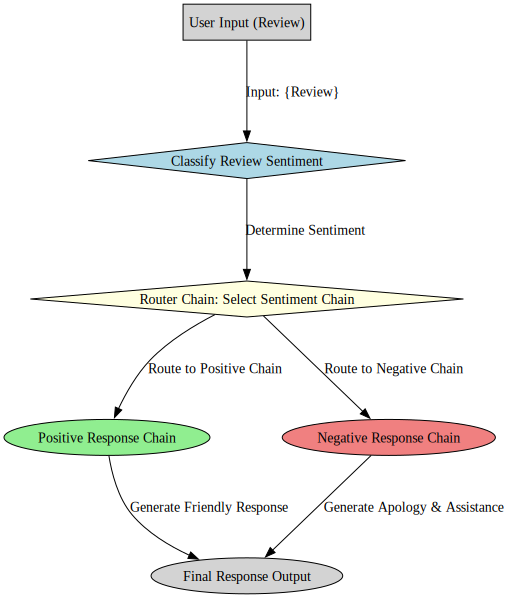

'Visualization_graphs\\LLMRouterChain_flowchart_2.png'

In [29]:
#from graphviz import Digraph

def visualize_sentiment_chain():
    dot = Digraph("SentimentRouter")

    # Set global graph attributes for better readability
    dot.attr(rankdir="TB", ranksep="1.2", nodesep="1.0")  

    # Define Nodes with different shapes
    dot.node("A", "User Input (Review)", shape="box", style="filled", fillcolor="lightgrey")
    dot.node("B", "Classify Review Sentiment", shape="diamond", style="filled", fillcolor="lightblue")
    dot.node("C", "Router Chain: Select Sentiment Chain", shape="diamond", style="filled", fillcolor="lightyellow")
    
    # Positive & Negative Response Chains
    dot.node("D1", "Positive Response Chain", shape="ellipse", style="filled", fillcolor="lightgreen")
    dot.node("D2", "Negative Response Chain", shape="ellipse", style="filled", fillcolor="lightcoral")

    # Final Output Node
    dot.node("E", "Final Response Output", shape="ellipse", style="filled", fillcolor="lightgrey")

    # Define Edges with labels
    dot.edge("A", "B", label="Input: {Review}")
    dot.edge("B", "C", label="Determine Sentiment")
    
    dot.edge("C", "D1", label="Route to Positive Chain")
    dot.edge("C", "D2", label="Route to Negative Chain")

    dot.edge("D1", "E", label="Generate Friendly Response")
    dot.edge("D2", "E", label="Generate Apology & Assistance")

    return dot

# Generate and render the flowchart
dot = visualize_sentiment_chain()
display(dot)
#dot.render("sentiment_router", format="png", view=True)


# Ensure the directory exists
#output_dir = "Visualization_graphs"
#os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "LLMRouterChain_flowchart_2"), format="png", view=True)



Inspect only the second item in the dataset and print the processed response directly in the output, 

In [30]:
import os
import datetime
import pandas as pd
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Load dataset
#file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
#df = pd.read_csv(file_path)

# Get the current date
# current_date = datetime.datetime.now().date()
# target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" #if current_date > target_date else "gpt-3.5-turbo-0301"

# Define different prompts
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
def classify_review(review):
    review_lower = review.lower()
    if any(word in review_lower for word in ["refund", "bad", "disappointed", "poor", "terrible"]):
        return "negative"
    elif any(word in review_lower for word in ["love", "great", "excellent", "amazing", "fantastic", "awesome"]):
        return "positive"
    else:
        return "support"

# Ensure there's a second item in the dataset
if len(df) < 2:
    raise ValueError("Dataset does not contain at least two items.")

# Select only the second item
df = df.iloc[[1]].copy()

df["Sentiment"] = df["review_body"].apply(classify_review)

# Initialize an empty dictionary to store destination chains
destination_chains = {}

for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  

destinations = [p['name'] for p in prompt_infos]
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)  

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT >>
"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)  

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

# Process and print the second review directly
row = df.iloc[0]
input_text = row["review_body"]
sentiment = row["Sentiment"]
response = chain.invoke({"input": input_text, "destination": sentiment.strip()})
print("Processed Review:")
print("Review:", input_text)
print("Sentiment:", sentiment)
print("Generated Response:", response)


C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\2908789014.py:95: LangChainDeprecationWarning: Please see migration guide here for recommended implementation: https://python.langchain.com/docs/versions/migrating_chains/multi_prompt_chain/
  chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)




> Entering new MultiPromptChain chain...
support: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


Processed Review:

Review: Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es 
persönlich nicht empfehlen.

Sentiment: support

Generated Response:
{
    'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. 
Kann es persönlich nicht empfehlen.',
    'destination': 'support',
    'text': "1. Apologize for the inconvenience caused by the spilled food and acknowledge the customer's 
frustration.\n2. Ask for more details about the situation, such as the specific product that was purchased and the 
size of the container.\n3. Offer a solution, such as a replacement product or a refund for the damaged item.\n4. 
Provide tips on how to prevent similar incidents in the future, such as securing the container or placing it in a 
safer location.\n5. Thank the customer for bringing the issue to your attention and assure them that their feedback
will be taken into consideration for future improvements."
}

**Explanation output** The output demonstrates the use of a MultiPromptChain to handle a customer review. The input review describes the contents of the review. The processed review is further analyzed for sentiment and categorized as "support." A generated response is provided, which includes steps to acknowledge the issue, request additional details, offer a solution, provide preventive tips, and thank the customer for their feedback.

- Example 2 Consider all the items of the dataset 

In [32]:
import datetime
import pandas as pd
import os
from langdetect import detect
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Load dataset
file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
df = pd.read_csv(file_path)

# Get the current date
#current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
#target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" #if current_date > target_date else "gpt-3.5-turbo-0301"

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Define different prompts
positive_template = """Generate a friendly thank-you response in the same language as this review: {input}"""
negative_template = """Generate a polite apology and offer assistance in the same language as this review: {input}"""
support_template = """Provide steps to resolve this customer support issue in the same language as this review: {input}"""

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
def classify_review(review):
    review_lower = review.lower()
    if any(word in review_lower for word in ["refund", "bad", "disappointed", "poor", "terrible"]):
        return "negative"
    elif any(word in review_lower for word in ["love", "great", "excellent", "amazing", "fantastic", "awesome"]):
        return "positive"
    else:
        return "support"

# Process dataset
df["Sentiment"] = df["review_body"].apply(classify_review)
df["Language"] = df["review_body"].apply(detect_language)

# Save the updated dataset
updated_file_path = "Updated_Data_New_Final_Classified.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved to {updated_file_path}")

# Initialize an empty dictionary to store destination chains
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [p['name'] for p in prompt_infos]  # Ensure only names are used
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}
```

REMEMBER: The value of "destination" MUST match one of \
the candidate prompts listed below.\
If "destination" does not fit any of the specified prompts, set it to "DEFAULT."
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

def process_reviews(df):
    responses = []
    for _, row in df.iterrows():
        input_text = row["review_body"]
        sentiment = row["Sentiment"]
        language = row["Language"]
        response = chain.invoke({"input": input_text, "destination": sentiment, "language": language})
        responses.append(response)
    
    df["Response"] = responses
    folder_name = "Processed Reviews"
    os.makedirs(folder_name, exist_ok=True)
    csv_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed.csv")
    html_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed.html")
    df.to_csv(csv_file_path, index=False)
    df.to_html(html_file_path, index=False)
    print(f"Processed dataset saved in '{folder_name}' folder:\n📄 CSV: {csv_file_path}\n🌐 HTML: {html_file_path}")

process_reviews(df)


Updated dataset saved to Updated_Data_New_Final_Classified.csv



> Entering new MultiPromptChain chain...
support: {'input': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte sich die Antriebswelle nicht.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


> Entering new MultiPromptChain chain...
support: {'input': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend."}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Innensohle löste sich nach ca.4 Wochen auf, Klettverschluss ebenfalls abgenutzt und geht kaputt.Diese Schuhe sind nicht zu empfehlen, billige Qualität.'}
> Finished chain.


> Entering new MultiPromptChain chain...
support: {'input': 'Der Akku ist halt ein Origin

Processed dataset saved in 'Processed Reviews' folder:
📄 CSV: Processed Reviews\Updated_Data_New_Final_Processed.csv
🌐 HTML: Processed Reviews\Updated_Data_New_Final_Processed.html

get both the response in its original languange and translated in English TO BE DECIDE IF THIS CAN BE EXCLUDED

In [33]:
import datetime
import pandas as pd
import os
from langdetect import detect
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Load dataset
file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
df = pd.read_csv(file_path)

# Get the current date
#current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
#target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" #if current_date > target_date else "gpt-3.5-turbo-0301"

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Define different prompts
positive_template = """Generate a friendly thank-you response in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

negative_template = """Generate a polite apology and offer assistance in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

support_template = """Provide steps to resolve this customer support issue in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
def classify_review(review):
    review_lower = review.lower()
    if any(word in review_lower for word in ["refund", "bad", "disappointed", "poor", "terrible"]):
        return "negative"
    elif any(word in review_lower for word in ["love", "great", "excellent", "amazing", "fantastic", "awesome"]):
        return "positive"
    else:
        return "support"

# Process dataset
df["Sentiment"] = df["review_body"].apply(classify_review)
df["Language"] = df["review_body"].apply(detect_language)

# Save the updated dataset
updated_file_path = "Updated_Data_New_Final_Classified_V2.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved to {updated_file_path}")

# Initialize an empty dictionary to store destination chains
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [p['name'] for p in prompt_infos]  # Ensure only names are used
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}
```

REMEMBER: The value of "destination" MUST match one of \
the candidate prompts listed below.\
If "destination" does not fit any of the specified prompts, set it to "DEFAULT."
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

def process_reviews(df):
    responses = []
    for _, row in df.iterrows():
        input_text = row["review_body"]
        sentiment = row["Sentiment"]
        language = row["Language"]
        response = chain.invoke({"input": input_text, "destination": sentiment, "language": language})
        responses.append(response)
    
    df["Response"] = responses
    folder_name = "Processed Reviews"
    os.makedirs(folder_name, exist_ok=True)
    csv_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed_v2.csv")
    html_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed_v2.html")
    df.to_csv(csv_file_path, index=False)
    df.to_html(html_file_path, index=False)
    print(f"Processed dataset saved in '{folder_name}' folder:\n📄 CSV: {csv_file_path}\n🌐 HTML: {html_file_path}")

process_reviews(df)


Updated dataset saved to Updated_Data_New_Final_Classified_V2.csv



> Entering new MultiPromptChain chain...
support: {'input': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte sich die Antriebswelle nicht.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


> Entering new MultiPromptChain chain...
support: {'input': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend."}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Innensohle löste sich nach ca.4 Wochen auf, Klettverschluss ebenfalls abgenutzt und geht kaputt.Diese Schuhe sind nicht zu empfehlen, billige Qualität.'}
> Finished chain.


> Entering new MultiPromptChain chain...
support: {'input': 'Der Akku ist halt ein Origin

Processed dataset saved in 'Processed Reviews' folder:
📄 CSV: Processed Reviews\Updated_Data_New_Final_Processed_v2.csv
🌐 HTML: Processed Reviews\Updated_Data_New_Final_Processed_v2.html

**Explanation output** TO BE DRAFTED

### Memory

Memory in LangChain allows the model to maintain a state across interactions. This is essential for tasks that require context or history, such as conversations or multi-step workflows.

#### Types of Memory
- **ConversationBufferMemory**: Stores the entire conversation history.
- **ConversationSummaryMemory**: Summarizes the conversation history.

#### ConversationBufferMemory Examples

- Example 1

This example demonstrates how to use `ConversationBufferMemory` to maintain the state of a conversation.

In [34]:
# Import required libraries for data processing and environment management
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
from langchain.chat_models import ChatOpenAI

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Initialize the memory
memory = ConversationBufferMemory()

# Create a ConversationChain with memory
conversation = ConversationChain(llm=llm, memory=memory)

# Simulate a conversation
response1 = conversation.predict(input="Hello, who are you?")
response2 = conversation.predict(input="Can you tell the latest improvements in the home category?")

# Print the responses
print(response1)
print(response2)

C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\3694377307.py:7: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0.9, model=llm_model)
C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\3694377307.py:10: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\3694377307.py:13: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/lang

Hello! I am an artificial intelligence designed to assist you with any questions or tasks you may have. I have 
access to a wide range of information and can provide detailed answers on a variety of topics. How can I help you 
today?

Certainly! In the home category, some of the latest improvements include smart home technology such as 
voice-activated assistants, automated lighting systems, and smart thermostats that can adjust the temperature based
on your preferences. Home security systems have also advanced with features like facial recognition and remote 
monitoring capabilities. Additionally, eco-friendly home upgrades such as solar panels and energy-efficient 
appliances are becoming more popular to reduce carbon footprints and save on energy costs. Is there anything 
specific you would like to know more about in the home category?

**Explanation of Output**: The above example shows how the `ConversationBufferMemory` keeps track of the conversation history. 
Each input is processed in the context of the previous interactions, allowing for more coherent and context-aware responses.

- Example 2

This example demonstrates how to use `ConversationBufferMemory` First, it describes the product in one sentence, then it expands on the description with more details. Finally, it stores the conversation history, allowing follow-up queries.

In [35]:
# Import necessary modules
#from langchain.chains import LLMChain, SequentialChain
#from langchain.memory import ConversationBufferMemory
#from langchain.chat_models import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate

# Initialize the language model
llm = ChatOpenAI(temperature=0.7, model=llm_model) 

# Initialize memory
memory = ConversationBufferMemory(memory_key="history", return_messages=True)

# Define the first LLMChain
chain1 = LLMChain(
    llm=llm, 
    prompt=ChatPromptTemplate.from_template("Describe {product_category} in one sentence."),
    output_key="description"
)

# Define the second LLMChain
chain2 = LLMChain(
    llm=llm, 
    prompt=ChatPromptTemplate.from_template("Explain more about: {description}."),
    output_key="detailed_explanation"
)

# Create a SequentialChain with memory
full_chain = SequentialChain(
    chains=[chain1, chain2],
    input_variables=["product_category"],  # Must match first chain's input key
    #output_variables=["description", "detailed_explanation"],  # Track outputs
    output_variables=["description"],  # ],
    memory=memory,  # Attach memory
    verbose=True
)

# Example product input
product = "pet_products"

# Execute the chain and print the result
response = full_chain.invoke({"product_category": product})
print(response)

#from langchain.chains import SimpleSequentialChain
chain1 = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Describe {product_category} in one sentence."))
chain2 = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Explain more about: {input}."))

# Create a SimpleSequentialChain
full_chain = SimpleSequentialChain(chains=[chain1, chain2])
#overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two], verbose=True)

# Execute the chain and print the result
#print(full_chain.invoke(product))

# Execute the chain
response = full_chain.invoke(product)

# Print response and memory history
print("Response:", response)
#print("Memory History:", memory.history)  # Check what has been remembered
print("Memory Buffer:", memory.buffer)  # Access memory buffer to see the conversation histor




> Entering new SequentialChain chain...

> Finished chain.


{
    'product_category': 'pet_products',
    'history': [
        HumanMessage(content='pet_products', additional_kwargs={}, response_metadata={}),
        AIMessage(
            content='Pet products are essential items that cater to the well-being and comfort of domestic animals,
including food, toys, grooming supplies, and accessories.',
            additional_kwargs={},
            response_metadata={}
        )
    ],
    'description': 'Pet products are essential items that cater to the well-being and comfort of domestic animals, 
including food, toys, grooming supplies, and accessories.'
}

Response:
{
    'input': 'pet_products',
    'output': 'Pet products are essential items that cater to the needs of pets and help provide them with a 
comfortable and enjoyable living environment. These products can include a wide range of items such as toys, food, 
bedding, grooming supplies, and accessories.\n\nToys are important for pets as they provide mental stimulation and 
help keep them entertained. There are various types of toys available for different pets, such as chew toys for 
dogs and interactive toys for cats.\n\nFood is another essential pet product that provides pets with the necessary 
nutrients and energy to stay healthy. There are different types of pet food available, including dry food, wet 
food, and treats, catering to the dietary needs of different pets.\n\nBedding is important for pets to have a 
comfortable place to rest and sleep. There are various types of pet beds available, including soft beds, pillows, 
and blankets, designed to provide pets with a cozy and warm sleeping space.\n\nGrooming supplies are essential for 
maintaining the hygiene and appearance of pets. These products can include brushes, combs, nail clippers, and 
shampoos, helping pet owners keep their pets clean and well-groomed.\n\nAccessories are additional items that can 
enhance the comfort and enjoyment of pets. These can include pet carriers, leashes, collars, and clothing, 
providing pets with added convenience and style.\n\nOverall, pet products play a crucial role in the care and 
well-being of pets, helping pet owners provide their furry friends with a happy and healthy life.'
}

Memory Buffer:
[
    HumanMessage(content='pet_products', additional_kwargs={}, response_metadata={}),
    AIMessage(
        content='Pet products are essential items that cater to the well-being and comfort of domestic animals, 
including food, toys, grooming supplies, and accessories.',
        additional_kwargs={},
        response_metadata={}
    )
]

**Explanation of Output**: The `ConversationSummaryMemory` provides a summarized version of the conversation history, which helps in maintaining the context without storing every single interaction. This is useful for long conversations where a full history might be too verbose.

#### Comparison

- **ConversationBufferMemory**: Stores the full conversation history, making it suitable for applications where detailed context is necessary.
- **ConversationSummaryMemory**: Provides a summarized version of the conversation, which is useful for maintaining context in a more concise form.

**Conclusion**: Memory mechanisms in LangChain are crucial for building applications that require context or state across multiple interactions. Depending on the use case, you can choose between `ConversationBufferMemory` and `ConversationSummaryMemory` to manage the conversation history effectively

So far, we have demonstrated a sequential process for handling reviews, involving multiple steps such as translation, summarization, and response generation. This mimics the behavior of an intelligent agent that performs tasks and makes decisions based on input. The current workflow processes reviews sequentially, similar to an agent, using a series of transformations (translation, summarization, language detection, response generation) and the SequentialChain to invoke each step in order. This resembles task delegation by an agent.

However, these workflows lack the dynamic decision-making and tool invocation characteristic of a full LangChain agent. While the workflows can be seen as agents in a traditional sense, they do not align with LangChain's definition of an "agent" that includes tools and decision-making capabilities.

`In LangChain, an agent` typically:
- Receives an input or query.
- Uses tools (like APIs or custom functions) to perform various tasks.
- Makes decisions about which tools to use and in what sequence based on logic or a language model.

Traditional `LangChain agents` incorporate `decision-making`, where the agent decides which tools to invoke based on conditions. For example, an agent might use one tool for translation if the text is not in English, or another for summarization. The current workflows execute in a fixed order without decision-making logic. LangChain agents can `dynamically invoke different tools` based on context (e.g., calling a tool for translation only if the text is not in English). The current workflows lack such dynamic tool invocation and are linear pipelines.

To sum up, while the current code processes reviews sequentially, it lacks the dynamic decision-making and tool invocation of a full LangChain agent. By adding dynamic tool invocation and decision-making, we can structure it as an agent. To make the workflow more agent-like in the LangChain sense, we could:

- Use initialize_agent to define specific tools (e.g., review fetching, language detection).
- Allow the agent to choose which steps to perform based on input (e.g., decide whether to translate based on detected language).
- Handle multiple tools dynamically by having the agent assess the input and decide on actions.

For example, we could create an agent that decides whether to invoke the translation step or skip it if the review is already in English.

Example 1: Here’s a basic modification of how we could structure this using LangChain’s agent pattern:

- Example 1  
Here’s a basic modification of how we could structure this using LangChain’s agent pattern:

In [ ]:
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool

# Define a tool for translating reviews
def translate_review(review):
    # Your translation logic here
    translated_review = "Translated review text"  # Placeholder for actual translation logic
    return translated_review

# Define a tool for summarizing reviews
def summarize_review(review):
    # Your summarization logic here
    summary = "Summary of the review"  # Placeholder for actual summarization logic
    return summary

# Define a tool for detecting language
def detect_language(review):
    # Your language detection logic here
    detected_language = "Detected language"  # Placeholder for actual language detection logic
    return detected_language

# Initialize the tools
tools = [
    Tool(name="Translate", func=translate_review, description="Translate review to English"),
    Tool(name="Summarize", func=summarize_review, description="Summarize the review"),
    Tool(name="Detect Language", func=detect_language, description="Detect the language of the review")
]

# Initialize the agent
llm = ChatOpenAI(temperature=0.9, model=llm_model)
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Can dynamically choose tools based on the input
    verbose=True
)

# Example usage with the agent
# Example review data
review_data = {
    "review_body": df.iloc[32]['review_body']
}

response = agent.invoke(f"Process the review: {review_data}")
print(response)

C:\Users\Michela\AppData\Local\Temp\ipykernel_10000\3261631837.py:31: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(




> Entering new AgentExecutor chain...
You need to determine the language of the review and then translate it to English.
Action: Detect Language
Action Input: "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue."
Observation: Detected language
Thought:Now that we know the language is French, let's translate the review to English.
Action: Translate
Action Input: "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue."
Observation: Translated review text
Thought:The review is about receiving only one travel mug instead of two as the description stated, leading to disappointment.
Final Answer: The reviewer is disappointed because they only received one travel mug instead of the expected two.

> Finished chain.


{
    'input': 'Process the review: {\'review_body\': "Je n\'ai reçu qu\'une tasse de voyage alors que le descriptif 
disait que j\'en recevais deux. Je suis donc déçue."}',
    'output': 'The reviewer is disappointed because they only received one travel mug instead of the expected two.'
}

**Explanation output** In this case, adding dynamic tool invocation the agent can make decisions dynamically on which tool to use based on the input, such as skipping translation if the review is already in English or detecting the language before performing a translation.

 To make the above workflow more like an agent in the LangChain sense, we could:  
- Use initialize_agent to define specific tools (e.g., review fetching, language detection, etc.).  
- Allow the agent to choose which steps to perform based on the input (for instance, decide whether to translate based on the detected language).  
- Handle multiple tools dynamically by having the agent assess the input and decide what actions to take.  

- Example 2  

In [37]:
from langchain.prompts import ChatPromptTemplate

# Define a prompt template to detect whether translation is needed and proceed accordingly
review_processing_prompt = ChatPromptTemplate.from_template(
    """
    You are a multi-tasking assistant. Here is a review from a customer:

    {Review}

    Tasks:
    1. First, detect the language of the review. If the review is not in English, translate it to English.
    2. Summarize the review in one sentence.
    3. After summarizing, generate a follow-up message in the detected language of the original review, or in English if the review is in English.

    Provide the following outputs:
    - Language: Detected language of the review.
    - Translated Review: If translation is needed, provide the translated review.
    - Summary: One-sentence summary of the review.
    - Follow-up Message: A brief, polite, and appropriate follow-up message based on the summary.

    Start processing the review.
    """
)

# Example usage of the template
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # You can specify your own model like "gpt-3.5-turbo"

# Create a chain with the prompt template
chain = LLMChain(llm=llm, prompt=review_processing_prompt)


# Example review data
input_review = {
    "review_body": df.iloc[32]['review_body']
}


# Execute the chain to process the review
result = chain.invoke({"Review": input_review})

# Print the result
print(result)

{
    'Review': {
        'review_body': "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. 
Je suis donc déçue."
    },
    'text': 'Language: French\nTranslated Review: I only received one travel mug when the description said I would 
receive two. I am disappointed.\nSummary: Customer received only one travel mug instead of two as described, 
leading to disappointment.\nFollow-up Message: We apologize for the error in your order and will ensure that the 
missing travel mug is sent to you promptly. Thank you for bringing this to our attention.'
}

**Explanation output** The output is a processed customer review in JSON format. It includes the original review (in French), where the customer expresses, a translated version of the review in English, a summary indicating the issue of receiving fewer items than described and finally a follow-up message apologizing for the error and promising to send the missing travel mug promptly.

- Example 3    
Here’s another example of a basic modification of how we could create an agent that dynamically decides whether to invoke the translation step or skip it if the review is already in English.

In [39]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.OpenAI()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        while self.get_token_count() > 16385:
            self.messages.pop(1)  # Remove oldest message to stay within token limit
        return self.execute()

    def get_token_count(self):
        return sum(len(message["content"].split()) for message in self.messages)

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent, translator):
    if not review or pd.isna(review):
        return {"Language": None, "Translated Review": None, "Summary": None, "Follow-up Message": None}

    detected_language = detect(review)
    translated_review = review if detected_language == "en" else translator.translate(review)
    
    summary_prompt = f"Summarize the following review in one sentence:\nReview: \"{translated_review}\"\nSummary:"
    summary = agent(summary_prompt)
    
    follow_up_prompt = f"Generate a brief, polite follow-up message in the original language or English if already in English:\nReview: \"{review}\"\nFollow-up Message:"
    follow_up_message = agent(follow_up_prompt)
    
    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    translator = GoogleTranslator(source='auto', target='en')  # Initialize once

    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"] == product_name].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            print(f"Processing {len(reviews)} reviews for product category: {product_name}")
            product_reviews[product_name] = [process_review(review, agent, translator) for review in reviews]

    return product_reviews

# Initialize the agent
abot = Agent()

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)


Processing 3 reviews for product category: kitchen

Processing 3 reviews for product category: pet_products

Processing 3 reviews for product category: shoes

Processing 3 reviews for product category: home_improvement

Processing 2 reviews for product category: jewelry

Processing 3 reviews for product category: industrial_supplies

Processing 2 reviews for product category: pc

Processing 1 reviews for product category: home

Processing 2 reviews for product category: other

Processing 2 reviews for product category: lawn_and_garden

Processing 3 reviews for product category: sports

{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'Summary: The device arrived defective with the display showing programs running 
but the drive shaft not moving.\n\nFollow-up Message: We apologize for the inconvenience caused by the defective 
device and would like to assist you in resolving this issue promptly.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': 'The review mentions that the device is suitable for making burger patties but not preferred
for steaks, hands, or sausages, with a positive note on its appearance and space-saving design.',
            'Follow-up Message': 'I will now detect the language of the review and translate it if needed. Let me 
summarize the review and generate a polite follow-up message for you.'
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with reservations.',
            'Follow-up Message': "I'm sorry to hear about the issues you faced with the product, and I appreciate 
you sharing your feedback. If you have any further concerns or need assistance, please feel free to reach out to 
the customer support team for help."
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'The product was quickly destroyed by the dog and the reviewer does not recommend it.',
            'Follow-up Message': "I'm sorry to hear about your experience with the product, and thank you for 
sharing your feedback."
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': 'The review mentions that the product is not good because feces sticks to the butt.',
            'Follow-up Message': "I'm sorry to hear about your experience. If you need any assistance or further 
information, please feel free to reach out."
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'This review is too brief to provide a meaningful summary.',
            'Follow-up Message': 'It seems like the review is expressing satisfaction with having tasted the 
product.'
        }
    ],
    'shoes': [
        {
            'Language': 'de',
            'Translated Review': 'Inside sole dissolved after about 4 weeks, Velcro also worn out and breaks. This 
shoes are not recommended, cheap quality.',
            'Summary': 'The shoes experienced issues with the inside sole dissolving and the Velcro wearing out 
after about 4 weeks, leading to a recommendation against their purchase due to poor quality.',
            'Follow-up Message': "I'm sorry to hear about the issues you faced with the shoes. Thank you for 
sharing your experience."
        },
        {
            'Language': 'en',
            'Translated Review': '',
            'Summary': 'The review indicates dissatisfaction with the cheap and flimsy

**Explation output** The output diplays all the reviews for each category product. It includes the language of the review, a translated version of the review in English, a summary indicating the issue of receiving fewer items than described and finally a follow-up message apologizing for the error and promising to send the missing travel mug promptly.

- Example 4    TO BE DECIDE WHICH IS THE BEST OUTPUT BEWEEN EXAMPLE 3 AND 4 (THE SNIPPET COE NOT DIFFER EACHOTHER SO MUCH). IT SEEMS BETTER EXAMPLE 4 THAN EXAMPLE 3

In [40]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.OpenAI()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        while self.get_token_count() > 16385:
            self.messages.pop(1)  # Remove oldest message to stay within token limit
        return self.execute()

    def get_token_count(self):
        return sum(len(message["content"].split()) for message in self.messages)

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent, translator):
    if not review or pd.isna(review):
        return {"Language": None, "Translated Review": None, "Summary": None, "Follow-up Message": None}

    detected_language = detect(review)
    translated_review = review if detected_language == "en" else translator.translate(review)

    # Summarize the review
    summary_prompt = f"Summarize the following review in one sentence:\nReview: \"{translated_review}\"\nSummary:"
    summary = agent(summary_prompt)

    # Generate a follow-up message in English first
    follow_up_prompt = f"Generate a brief, polite follow-up message for this review:\nReview: \"{translated_review}\"\nFollow-up Message:"
    follow_up_message = agent(follow_up_prompt)

    # If the review was in a different language, translate the follow-up message back
    if detected_language != "en":
        follow_up_message = translator.translate(follow_up_message, source="en", target=detected_language)

    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    translator = GoogleTranslator(source="auto", target="en")  # Initialize once

    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"] == product_name].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            print(f"Processing {len(reviews)} reviews for product category: {product_name}")
            product_reviews[product_name] = [process_review(review, agent, translator) for review in reviews]

    return product_reviews

# Initialize the agent
abot = Agent()

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)


Processing 3 reviews for product category: kitchen

Processing 3 reviews for product category: pet_products

Processing 3 reviews for product category: shoes

Processing 3 reviews for product category: home_improvement

Processing 2 reviews for product category: jewelry

Processing 3 reviews for product category: industrial_supplies

Processing 2 reviews for product category: pc

Processing 1 reviews for product category: home

Processing 2 reviews for product category: other

Processing 2 reviews for product category: lawn_and_garden

Processing 3 reviews for product category: sports

{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'Summary: The device arrived defective with the display showing programs running 
but the drive shaft not moving.\n\nFollow-up Message: We apologize for the inconvenience caused by the defective 
device you received and we are committed to resolving this issue promptly for you.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': "The review mentions that the burger patties are good for sandwiches, but the reviewer does 
not like the steaks, hands, or sausages, appreciating the device's appearance and space-saving design.",
            'Follow-up Message': 'Follow-up Message: Thank you for sharing your feedback on the device, we 
appreciate your insights on its functionality and design.'
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with reservations.',
            'Follow-up Message': "I can help summarize and generate a follow-up message for the review. Let's start
with the summary:\n\nSummary: The product is well-made but has unpainted parts, and the inability to microwave it 
is a drawback, making the reviewer hesitant to keep it despite its aesthetic appeal.\n\nNow, let's craft a polite 
follow-up message:\nFollow-up Message: Thank you for sharing your feedback. We appreciate your detailed review and 
will take into consideration your comments about the product's design and microwave compatibility for future 
improvements."
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'The dog quickly scattered the feed around in less than 30 seconds, leading to a personal 
recommendation against the product.',
            'Follow-up Message': 'Summary: The product did not meet expectations as it was easily scattered by the 
dog.\n\nFollow-up Message: Thank you for sharing your experience with the product, we appreciate your feedback and 
will take it into consideration for future improvements.'
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': 'The product is not satisfactory as feces sticks to the butt.',
            'Follow-up Message': 'Summary: The product is not effective as feces stick to the butt.\n\nFollow-up 
Message: Thank you for sharing your feedback. We apologize for any inconvenience caused and will take your comments
into consideration for future improvements.'
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'This review is too brief to provide a meaningful summary.',
            'Follow-up Message': 'It seems like the review is incomplete or missing context, making it difficult to
summarize accurately. If you have more details or specific feedback to share, please feel free to provide them.'
        }
    ],
    'shoes':

**Explanation output** The output diplays all the reviews for each category product. It includes the language of the review, a translated version of the review in English, a summary indicating the issue of receiving fewer items than described and finally a follow-up message apologizing for the error and promising to send the missing travel mug promptly.

-Considering `all the customer feedbacks for all the product categories enclosed in the given dataset`. The above output shows that we can still improve the responses to the reviewers, given them a response in the original languange. This can done, modifying the SYSTEM PROMPT 

In [47]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define response templates
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.Client()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent):
    detected_language = detect(review)
    translated_review = review if detected_language == "en" else GoogleTranslator(source='auto', target='en').translate(review)
    
    # Summarize the review
    summary_prompt = f"""
    Summarize the following review in one sentence:
    Review: "{translated_review}"
    Summary:
    """
    summary = agent(summary_prompt)
    
    # Generate a follow-up message in the original language
    follow_up_prompt = f"""
    Generate a brief, polite follow-up message in the original language or English if already in English for this review:
    Review: "{review}"
    Follow-up Message:
    """
    follow_up_message = agent(follow_up_prompt)
    
    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"].str.contains(str(product_name), case=False, na=False)].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            product_reviews[product_name] = [process_review(review, agent) for review in reviews]
    return product_reviews

# Initialize the agent
abot = Agent(SYSTEM_PROMPT)

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)

# Flatten the processed_reviews dictionary
flattened_reviews = []
for product, reviews in processed_reviews.items():
    for review in reviews:
        review["product_category"] = product
        flattened_reviews.append(review)

# Convert flattened results to DataFrame
product_categoryresponse_df = pd.DataFrame(flattened_reviews)

# Save to CSV and HTML
#product_categoryresponse_df.to_csv("generated_responses_l.csv", index=False)
#product_categoryresponse_df.to_html("generated_responses_l.html", index=False)

#print("Responses saved to 'generated_responses_l.csv' and 'generated_responses_L.html'")


# Create folder if it doesn't exist
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Define file paths
csv_path = os.path.join(output_folder, "generated_responses_l.csv")
html_path = os.path.join(output_folder, "generated_responses_l.html")

# Save to CSV and HTML
product_categoryresponse_df.to_csv(csv_path, index=False)
product_categoryresponse_df.to_html(html_path, index=False)

print(f"Responses saved to '{csv_path}' and '{html_path}'")




{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'We are sorry to hear that the device arrived defective. Please contact our 
customer support for assistance with resolving this issue.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': 'The device is suitable for making burger patties but not preferred for steaks, hands, or 
sausages, with a compact and visually appealing design.',
            'Follow-up Message': 'Thank you for sharing your feedback on the device. We appreciate your comments 
and will take them into consideration for future improvements.'
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with some reservations.',
            'Follow-up Message': 'Thank you for your detailed feedback on the product. We apologize for any 
inconvenience caused by the unpainted parts and the microwave restriction. Your comments will be shared with the 
relevant team for further review.'
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'The dog toys were quickly scattered by the dog within 30 seconds, leading to a 
recommendation against them.',
            'Follow-up Message': 'Thank you for sharing your experience with the dog toys. We apologize for any 
inconvenience caused and appreciate your feedback, which will be taken into consideration for product improvement.'
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': 'The product is not effective as feces sticks to the butt.',
            'Follow-up Message': 'Thank you for sharing your feedback. We apologize for any inconvenience caused 
and will look into ways to improve the product to address this issue.'
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'The product was tried and enjoyed. :)',
            'Follow-up Message': 'We are glad to hear that you enjoyed the product! Thank you for sharing your 
positive experience. :)'
        }
    ],
    'shoes': [
        {
            'Language': 'de',
            'Translated Review': 'Inside sole dissolved after about 4 weeks, Velcro also worn out and breaks. This 
shoes are not recommended, cheap quality.',
            'Summary': 'The shoes had issues with the insole dissolving and the Velcro wearing out quickly, 
indicating poor quality and not recommended.',
            'Follow-up Message': 'Thank you for sharing your experience with the shoes. We apologize for the 
quality issues you encountered and appreciate your feedback, which will be used to improve our products.'
        },
        {
            'Language': 'en',
            'Translated Review': '',
            'Summary': 'The sunglasses felt cheap and flimsy, prompting the decision to return them despite an okay
appearanc

Responses saved to 'Processed Reviews\generated_responses_l.csv' and 'Processed Reviews\generated_responses_l.html'

**Explanation output** The output is a JSON structure containing categorized customer reviews for all the product categories. Each review includes:
the language in which the review was written, the Translated Review,  A concise summary of the review and a Follow-up response message addressing the customer's feedback in the language in which the review is written. 


-Considering `all the customer feedbacks for all the product categories enclosed in the given dataset`

In [ ]:
import openai
import pandas as pd

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define different response templates
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

# Define structured response categories
prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issues", "prompt_template": support_template}
]

# Define the Agent class
class Agent:
    def __init__(self, system=""):
        self.client = openai.Client()  # Correct OpenAI client instantiation
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Updated system prompt
SYSTEM_PROMPT = f"""
You are a professional AI customer support assistant.
Your goal is to provide personalized, polite, and professional responses
to user queries regarding product reviews.

**Response Strategy:**
1. Analyze the sentiment of reviews for each product.
2. Choose the appropriate response template:
   - Positive → Thank the user and reinforce product strengths.
   - Negative → Apologize and offer assistance or solutions.
   - Support Request → Provide clear steps to resolve the issue.
3. Generate structured, informative, and engaging responses.

**Available Response Templates:**
- Positive: {positive_template}
- Negative: {negative_template}
- Support: {support_template}
"""

# Function to retrieve reviews for all products
def retrieve_reviews_for_all_products(df, top_n=3):
    product_reviews = {}
    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"].str.contains(str(product_name), case=False, na=False)].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            product_reviews[product_name] = reviews
    return product_reviews

# Function to analyze sentiment using OpenAI
def analyze_sentiment(review, agent):
    sentiment_prompt = f"""
    Analyze the sentiment of the following product review and classify it as Positive, Neutral, or Negative:

    Review: "{review}"

    Sentiment:
    """
    sentiment = agent(sentiment_prompt).lower()
    
    if "positive" in sentiment:
        return "Positive"
    elif "negative" in sentiment:
        return "Negative"
    else:
        return "Neutral"

# Function to generate responses for all products
def generate_responses_for_all_products(product_reviews, agent):
    if not product_reviews:
        return "No reviews found for any products."

    response_list = []

    for product, reviews in product_reviews.items():
        sentiment_results = {"Positive": 0, "Neutral": 0, "Negative": 0}
        review_responses = []

        for review in reviews:
            sentiment = analyze_sentiment(review, agent)
            sentiment_results[sentiment] += 1

            # Select appropriate response template
            template = {
                "Positive": positive_template,
                "Negative": negative_template,
                "Neutral": support_template
            }.get(sentiment, support_template)

            # Generate response using the template
            formatted_prompt = template.format(input=review)
            response = agent(formatted_prompt)
            review_responses.append({
                "product_category": product,
                "review_body": review,
                "Sentiment": sentiment,
                "Response": response
            })

        # Summarize sentiment results for the product
        total_reviews = len(reviews)
        sentiment_summary = f"{total_reviews} reviews: {sentiment_results['Positive']} Positive, {sentiment_results['Neutral']} Neutral, {sentiment_results['Negative']} Negative."

        # Append structured data
        response_list.extend(review_responses)

    return response_list

# Initialize the agent
abot = Agent(SYSTEM_PROMPT)

# Retrieve reviews for all products
product_reviews = retrieve_reviews_for_all_products(df)

# Generate responses for all products
response_data = generate_responses_for_all_products(product_reviews, abot)
print("Agent Response:\n", response_data)
# Convert results to DataFrame
response_df = pd.DataFrame(response_data)


# Create folder if it doesn't exist
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Define file paths
csv_path = os.path.join(output_folder, "generated_responses.csv")
html_path = os.path.join(output_folder, "generated_responses.html")

# Save to CSV and HTML
response_df.to_csv(csv_path, index=False)
response_df.to_html(html_path, index=False)

print(f"Responses saved to '{csv_path}' and '{html_path}'")



Agent Response:

[
    {
        'product_category': 'kitchen',
        'review_body': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte 
sich die Antriebswelle nicht.',
        'Sentiment': 'Negative',
        'Response': 'I apologize for the inconvenience you faced with the product arriving defective. Your feedback
is valuable to us. To resolve this issue, please contact our customer support team at [support@email.com] with your
order details, and we will assist you in getting a replacement or a refund promptly. Thank you for bringing this to
our attention.'
    },
    {
        'product_category': 'kitchen',
        'review_body': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde 
ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend.",
        'Sentiment': 'Neutral',
        'Response': "**Support:** To address your concerns with the product's performance on steaks, chicken, or 
sausages, we recommend adjusting the cooking settings or exploring alternative cooking methods for better results. 
For any specific issues or further assistance, please feel free to reach out to our customer support team at 
[support@email.com] with more details. We value your feedback and aim to ensure your satisfaction with our 
products. Thank you for sharing your experience."
    },
    {
        'product_category': 'kitchen',
        'review_body': 'Está muy bien lograda, pero tiene partes sin pintar. Por otro lado, el hecho de que no 
pueda meterla en el microondas (lo dice la etiqueta), me hecha para atrás. Es bonita, si no fuera por ello la 
devolvería. Recomendada, a medias.',
        'Sentiment': 'Neutral',
        'Response': '**Support:** To address the concerns you have regarding the product having unpainted parts and
not being microwave-safe, we recommend reaching out to our customer support team at [support@email.com] for further
assistance. They can provide guidance on potential solutions or offer a return if the product does not meet your 
expectations. Your feedback is valuable, and we aim to ensure your satisfaction with our products. Thank you for 
sharing your experience.'
    },
    {
        'product_category': 'pet_products',
        'review_body': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall 
verstreut. Kann es persönlich nicht empfehlen.',
        'Sentiment': 'Negative',
        'Response': 'I apologize for the inconvenience caused by your dog tipping over the product and scattering 
the food. Your feedback is important to us, and we understand your frustration. If you need assistance with a 
replacement or a refund, please contact our customer support team at [support@email.com] with your order details. 
We appreciate your feedback and will work to improve our product experience. Thank you for sharing your concerns.'
    },
    {
        'product_category': 'pet_products',
        'review_body': 'Ist nicht so gut weil der Kot am Hintern klebt',
        'Sentiment': 'Negative',
        'Response': 'I apologize for the unpleasant experience you had with the product. Your feedback is 
concerning, and we take it seriously. Please contact our customer support team at [support@email.com] with more 
details so we can assist you further and address this issue promptly. We appreciate your feedback and the 
opportunity to improve our product. Thank you for bringing this to our attention.'
    },
    {
        'product_category': 'pet_products',
        'review_body': 'geschmeckt zu haben. :)',
        'Sentiment': 'Positive',
        'Response': '**Positive:** Thank you for sharing your positive feedback! We are delighted to hear that you 
enjoyed the product. Your satisfaction is our priority, and we appreciate your support. If you have any more 
feedback or questions, feel free to reach out. Thank you for choosing our product!'
    },
    {
        'product_category': 'shoes',
    

Responses saved to 'Processed Reviews\generated_responses.csv' and 'Processed Reviews\generated_responses.html'

**Explanation output** The output contains a structured list of product reviews and corresponding agent responses. Each review includes:  
- product_category: The category to which the product belongs (e.g., kitchen, pet_products, shoes).  
- review_body: The text of the customer's review.  
- Sentiment: The sentiment of the review (e.g., Positive, Negative, Neutral).   
- Response: The agent's response to the review, addressing the customer's feedback and providing guidance or solutions.  
The agent responses include apologies for any inconvenience, suggestions for resolving issues, and appreciation for positive feedback, along with contact details for further assistance.

#### Simple (Retrieval-Augmented Generation) ReAct Agent Using LangChain

A ReAct Agent combines retrieval and generation within an agent framework, dynamically retrieving relevant information and augmenting responses. We will build a basic ReAct (Retrieval-Augmented Generation) agent from scratch using the OpenAI API, capable of processing user inputs, performing predefined actions, and providing answers based on these actions.

To create the ReAct Agent, we need to:

- _Define Tools:_ Tools for retrieving information (e.g., from a CSV file or external database).
- _Agent's Response Strategy:_ Decide when to query tools or generate responses, using retrieval as needed.
- _Execution Flow:_ Interact with retrieval tools (e.g., fetching product reviews) and the language model (e.g., summarizing, translating).

Below is how we can create a simple ReAct-style agent using the OpenAI API:

In [12]:
import pandas as pd
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.chat_models import ChatOpenAI
import os

# Load dataset
csv_file = "Resized_Amazon_Reviews_Multi_Dataset.csv"  # Replace with actual file path
df = pd.read_csv(csv_file).fillna("")  # Handle NaN values

# Initialize the language model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")  # Adjusted temperature for better response quality

def fetch_reviews_from_product(product_name):
    """
    Fetch reviews based on the product name.
    """
    product_reviews = df.query("product_category.str.contains(@product_name, case=False, na=False)")
    
    if not product_reviews.empty:
        review = product_reviews.iloc[0]['review_body']
        return review
    else:
        return "No reviews found."

# Define a tool for fetching reviews
review_tool = Tool(
    name="Fetch_Reviews",
    func=fetch_reviews_from_product,
    description="Retrieve the latest review for a product."
)

tools = [review_tool]

# Initialize the agent with verbose output
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True  # Enabling verbose logging
)

# Define the prompt template
review_prompt = ChatPromptTemplate.from_template(
    """
    Given the review:
    {Review}
    Summarize the feedback in one sentence. 
    If the review is in a non-English language, translate it to English.
    """
)

chain = LLMChain(llm=llm, prompt=review_prompt)

# Process reviews efficiently with real-time monitoring of agent execution
results = []
total_reviews = len(df)
for idx, row in df.iterrows():
    product = row["product_category"]
    review = fetch_reviews_from_product(product)
    
    try:
        print(f"\nEntering new agent executor for product: {product}")
        
        if review != "No reviews found.":
            # Monitor agent execution with logging of thought, action, and observation
            print(f"Agent thinking about product: {product}")
            result = chain.invoke({"Review": review})
            
            # Log the result
            processed_review = result.get("text", "N/A")
            
            # Log the action taken by the agent
            print(f"Action taken by agent: {processed_review[:50]}...")
            
        else:
            processed_review = "No reviews found."
        
        # Monitor agent's observation and thoughts
        print(f"Agent's observation: Processed review for {product}")
        
        # Append results to the list
        results.append({
            "product_category": product,
            "review_body": review,
            "Processed Review": processed_review
        })
        
        # Log when the chain processing is finished
        print(f"Finished processing review for {product}.")
        
    except Exception as e:
        print(f"Error processing review for '{product}': {e}")

# Convert to DataFrame in one step
processed_df = pd.DataFrame(results)

# Display output in notebook
print("Processed Reviews DataFrame:")
print(processed_df)

# Save results
folder_name = "Processed_Reviews_Agent"
os.makedirs(folder_name, exist_ok=True)

processed_df.to_csv(os.path.join(folder_name, "Processed_Reviews_Agent.csv"), index=False)
processed_df.to_html(os.path.join(folder_name, "Processed_Reviews_Agent.html"), index=False, escape=False)


Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole and Velcro strap of the shoes came apar...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is original and works well, but the pa...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is original and of good quality, but t...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: jewelry

Agent thinking about product: jewelry

Action taken by agent: Summary: Beautiful item with good value for money,...

Agent's observation: Processed review for jewelry

Finished processing review for jewelry.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small and ineffective, causing iss...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pc

Agent thinking about product: pc

Action taken by agent: The customer's husband's purchased item stopped wo...

Agent's observation: Processed review for pc

Finished processing review for pc.

Entering new agent executor for product: home

Agent thinking about product: home

Action taken by agent: The battery is fine as it is an original, but the ...

Agent's observation: Processed review for home

Finished processing review for home.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole and Velcro strap of the shoes deteriora...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small and causes issues with start...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pc

Agent thinking about product: pc

Action taken by agent: The customer purchased the product for their husba...

Agent's observation: Processed review for pc

Finished processing review for pc.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is original and of good quality, but t...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: other

Agent thinking about product: other

Action taken by agent: The product is difficult for users to navigate and...

Agent's observation: Processed review for other

Finished processing review for other.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt on the mower is too small and will not wo...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: other

Agent thinking about product: other

Action taken by agent: The system is not easy to use for users....

Agent's observation: Processed review for other

Finished processing review for other.

Entering new agent executor for product: lawn_and_garden

Agent thinking about product: lawn_and_garden

Action taken by agent: The strings shown in the photos are not included....

Agent's observation: Processed review for lawn_and_garden

Finished processing review for lawn_and_garden.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: lawn_and_garden

Agent thinking about product: lawn_and_garden

Action taken by agent: The strings shown in the photos are not included....

Agent's observation: Processed review for lawn_and_garden

Finished processing review for lawn_and_garden.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective, as the display showe...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display showed...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog was able to knock over the prod...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display showed...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective with the display show...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking, ...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small and causes issues with start...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The dog knocked over the product within 30 seconds...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole and Velcro strap of the shoes deteriora...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: jewelry

Agent thinking about product: jewelry

Action taken by agent: The product is described as a nice item with a goo...

Agent's observation: Processed review for jewelry

Finished processing review for jewelry.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Processed Reviews DataFrame:

product_category                                        review_body  \
0               kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
1          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
2               kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
3                 shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
4      home_improvement  Der Akku ist halt ein Original, also nichts zu...   
5          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
6      home_improvement  Der Akku ist halt ein Original, also nichts zu...   
7          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
8               jewelry  Schönes Teil mit gutem Preis-/Leistungsverhält...   
9          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
10  industrial_supplies  Believe the other reviews, the belt is small a...   
11                   pc  Purchases this for my husband and after 3 mont...   
12                 home  Der Akku ist halt ein Original, also nichts zu...   
13                shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
14  industrial_supplies  Believe the other reviews, the belt is small a...   
15                   pc  Purchases this for my husband and after 3 mont...   
16     home_improvement  Der Akku ist halt ein Original, also nichts zu...   
17                other                            Not very user friendly.   
18  industrial_supplies  Believe the other reviews, the belt is small a...   
19                other                            Not very user friendly.   
20      lawn_and_garden        No traen las cuerdas que salen en las fotos   
21               sports  este producto no vale para mtb, a mitad de rut...   
22      lawn_and_garden        No traen las cuerdas que salen en las fotos   
23               sports  este producto no vale para mtb, a mitad de rut...   
24              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
25               sports  este producto no vale para mtb, a mitad de rut...   
26              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
27               sports  este producto no vale para mtb, a mitad de rut...   
28              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
29         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
30              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
31               sports  este producto no vale para mtb, a mitad de rut...   
32              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
33               sports  este producto no vale para mtb, a mitad de rut...   
34  industrial_supplies  Believe the other reviews, the belt is small a...   
35         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
36              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
37                shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
38              jewelry  Schönes Teil mit gutem Preis-/Leistungsverhält...   
39         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   

                                     Processed Review  
0   The device arrived defective as the display in...  
1   The reviewer's dog knocked over the product wi...  
2   The device arrived defective as the display in...  
3   The insole and Velcro strap of the shoes came ...  
4   The battery is original and works well, but th...  
5   The reviewer's dog knocked over the product wi...  
6   The battery is original and of good quality, b...  
7   The reviewer's dog knocked over the product wi...  
8   Summary: Beautiful item with good value for mo...  
9   The reviewer's dog knocked over the product wi...  
10  The belt is too small and ineffective, causing...  
11  The customer's husband's purchased item stoppe...  
12  The battery is fine as it is an original, but ...  
13  The insole and Velcr

**Explanation output** The above output  monitor the processing in real-time, showing progress for each product being processed and printing intermediate results while summarizing reviews.

#### The Tavily API

Our dataset already contains reviews, so we don’t necessarily need Tavily. But if we want to enrich the dataset with fresh online data, integrating Tavily API is a great option!

`The Tavily API` is useful when you need to fetch real-time information from the web, such as:  
✅ Latest product reviews from online sources  
✅ Market trends based on recent data  
✅ Competitive analysis by retrieving insights about similar products  

- Example with only one selected product_category

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("What are the main improvements of pets products in the last 2 years?")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

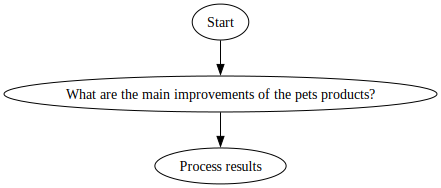

'Visualization_graphs\\agent_actions.png'

In [ ]:
#from graphviz import Digraph
#from IPython.display import Image

# Initialize the graph
dot = Digraph()

# Add nodes and edges based on the agent's actions
dot.node("A", "Start")
dot.node("B", "What are the main improvements of  pets products?")
dot.node("C", "Process results")
dot.edges(["AB", "BC"])

# Render the graph to a file
#output_path = dot.render("agent_actions", format="png", cleanup=True)

display(dot)

# Display the image
#Image(output_path)

# Ensure the directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "agent_actions"), format="png", view=True)

To process all items in the "product_category" column from the dataset,  we need to modify the code to load the dataset, extract the unique categories, and then iterate over those categories in the agent's queries.

In [12]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        query = f"What are the main improvements of {category}?"
        response = agent.invoke(query)
        print(f"Response for {category}: {response}")
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'What are the main improvements of kitchen?', 'output': 'The main improvements in 
kitchen technologies include a wide range of smart devices such as faucets, toasters, burners, microwaves, scales, 
air fryers, refrigerators, dishwashers, garbage disposals, and TVs, as well as eco-friendly and self-cleaning 
appliances, interactive surfaces, digital backsplashes, and high-tech lighting.'}

Response for pet_products: {'input': 'What are the main improvements of pet_products?', 'output': 'The main 
improvements of pet products include personalized nutrition, sustainable and eco-friendly options, ethically 
sourced ingredients, wearable technology, and smart feeding solutions.'}

Response for shoes: {'input': 'What are the main improvements of shoes?', 'output': 'The main improvements of shoes
include the development of new foams with improved energy return and reduced weight, the use of carbon plate 
midsole stabilizing elements, advancements in outsoles for better ground contact, and improvements in upper 
materials for breathability, reduced friction, and support. Additionally, advancements in foams, rubbers, textiles,
and construction have led to lighter, more dynamic, and resilient performance running shoes.'}

Response for home_improvement: {'input': 'What are the main improvements of home_improvement?', 'output': 'The main
improvements of home improvement include kitchen and bathroom renovations, adding a primary suite, upgrading garage
doors, replacing a front door with a steel one, and exterior improvement projects.'}

Response for jewelry: {'input': 'What are the main improvements of jewelry?', 'output': 'The main improvements in 
jewelry include advancements in materials, techniques, customization, sustainability, and the use of AI 
technologies.'}

Response for industrial_supplies: {'input': 'What are the main improvements of industrial_supplies?', 'output': 
'The main improvements of industrial supplies include smart power tools, eco-friendly supplies, advanced welding 
solutions, and IoT.'}

Response for pc: {'input': 'What are the main improvements of pc?', 'output': 'Some main improvements of personal 
computers include increased GPU power, advancements in solid-state memory, development of single-chip 
microprocessors, and the rise of GUI based operating systems.'}

Response for home: {'input': 'What are the main improvements of home?', 'output': 'The main improvements of home 
include kitchen renovation, bathroom addition, basement finishing, attic conversion, and maintaining cleanliness 
and maintenance.'}

Response for other: {'input': 'What are the main improvements of other?', 'output': 'The main improvements 
mentioned in the search results include honesty, respect, good judgment, empathy, sympathy, active listening, 
empathy, meaningfulness to work, job performance, managing stress, and engaging others.'}

Response for lawn_and_garden: {'input': 'What are the main improvements of lawn_and_garden?', 'output': 'The main 
improvements of lawn and garden include improving lawn quality, keeping pests off the lawn, enhancing foundation 
plantings, adding landscape focal points, and expanding landscape color.'}

Response for sports: {'input': 'What are the main improvements of sports?', 'output': 'The main improvements in 
sports include advancements in coaching, fan safety, technology use, injury recovery protocols, personalized 
training programs, predictive analysis, virtual reality, and sports injury diagnostics.'}

**Explanation output** As it can been seen from the above output,  the snipppet code does process all the product categories in the dataset and output the responses for each.
IMP Since few category_products are not wel defined in the dataset (e.g. others, howe, home_imporvements), the response to these product categories are not very usefull.

- Example 1 Latest Product Reviews from Online Sources  
📌 Goal: Fetch recent reviews to analyze customer feedback.

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("Find the latest customer reviews for pets products from different sources. Extract key opinions, pros, and cons.")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

{
    'input': 'Find the latest customer reviews for pets products from different sources. Extract key opinions, 
pros, and cons.',
    'output': 'The latest customer reviews for pets products include positive feedback on chew toys, name tags, 
wood chews, and pet blankets. Customers appreciate the durability, readability, and softness of the products.'
}

In [ ]:
# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    #response = agent.invoke("Find the latest customer reviews for pets products from Amazon source. Extract key opinions, pros, and cons.")
    response = agent.invoke("Find the latest customer reviews for {product_category} from Amazon source. Extract key opinions, pros, and cons.")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

{
    'input': 'Find the latest customer reviews for pets products from Amazon source. Extract key opinions, pros, 
and cons.',
    'output': 'The key opinions, pros, and cons from the latest customer reviews for pets products on Amazon 
include positive feedback on waterproof booties, lightweight pet strollers, cactus-shaped cat scratchers, stainless
steel fountains, and dog paw cleaners. Customers appreciate the functionality, quality, and practicality of these 
products for their pets.'
}

In [15]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Find the latest customer reviews for {category} from Amazon source. Extract key opinions, pros, and cons."
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Find the latest customer reviews for kitchen from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'The latest customer reviews for kitchen products on Amazon have not been 
successfully extracted using TavilySearch.'}

Response for pet_products: {'input': 'Find the latest customer reviews for pet_products from Amazon source. Extract
key opinions, pros, and cons.', 'output': 'Use AI tools supported by natural language processing to extract key 
opinions, pros, and cons from customer reviews.'}

Response for shoes: {'input': 'Find the latest customer reviews for shoes from Amazon source. Extract key opinions,
pros, and cons.', 'output': 'The key opinions, pros, and cons of the latest customer reviews for shoes on Amazon 
emphasize the positive aspects of design, comfort, and overall satisfaction with the products.'}

Response for home_improvement: {'input': 'Find the latest customer reviews for home_improvement from Amazon source.
Extract key opinions, pros, and cons.', 'output': 'Specific customer reviews for home_improvement with key 
opinions, pros, and cons from Amazon are not available through the TavilySearch tool. It may be more effective to 
search directly on the Amazon website for this information.'}

Response for jewelry: {'input': 'Find the latest customer reviews for jewelry from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'The latest customer reviews for jewelry from Amazon mention that customers 
find the necklace to be a good value for the money, sturdy, stylish, and with a nice weight. Customers also mention
the amazing quality, size, and sparkly charm of the jewelry.'}

Response for industrial_supplies: {'input': 'Find the latest customer reviews for industrial_supplies from Amazon 
source. Extract key opinions, pros, and cons.', 'output': 'Visit the Amazon links to extract key opinions, pros, 
and cons from the latest customer reviews for industrial_supplies.'}

Response for pc: {'input': 'Find the latest customer reviews for pc from Amazon source. Extract key opinions, pros,
and cons.', 'output': 'The key opinions, pros, and cons from the latest customer reviews for pc on Amazon are 
generally positive, highlighting good performance, value for money, and ease of use. Some customers prefer building
their own PC for cost efficiency.'}

Response for home: {'input': 'Find the latest customer reviews for home from Amazon source. Extract key opinions, 
pros, and cons.', 'output': 'The key opinions and reviews for the Amazon Key service for home delivery vary from 
positive reception to concerns about privacy and security.'}

Response for other: {'input': 'Find the latest customer reviews for other from Amazon source. Extract key opinions,
pros, and cons.', 'output': 'The key opinions, pros, and cons can be extracted from the latest customer reviews for
"other" on Amazon using tools like Amazon Reviews Extractor or by manually reviewing the reviews.'}

Response for lawn_and_garden: {'input': 'Find the latest customer reviews for lawn_and_garden from Amazon source. 
Extract key opinions, pros, and cons.', 'output': 'Specific customer reviews for lawn_and_garden on Amazon have 
been found.'}

Response for sports: {'input': 'Find the latest customer reviews for sports from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'To extract key opinions, pros, and cons from customer reviews on Amazon, you
can use tools like Review Fetcher for Amazon or GorillaROI to efficiently extract and analyze the reviews.'}

- Example 2 Market Trends Based on Recent Data    
📌 Goal: Get insights into trending products or industry movements.

consider only one product category

In [12]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("Summarize the latest market trends in pet products industry. Include insights on new products, technological advancements, and government policies Extract key opinions, pros, and cons.")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

C:\Users\Michela\AppData\Local\Temp\ipykernel_4392\988644547.py:31: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)
C:\Users\Michela\AppData\Local\Temp\ipykernel_4392\988644547.py:34: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from 

{'input': 'Summarize the latest market trends in pet products industry. Include insights on new products, technological advancements, and government policies Extract key opinions, pros, and cons.', 'output': 'The latest market trends in the pet products industry include a shift towards online shopping, growth in premium pet food segment, and resilience in pet food sales despite overall market softening. New products in the industry range from sustainable and eco-friendly products to luxury pet products like pet supplements and probiotics. Technological advancements in the industry involve AI-driven smart devices, wearables for health monitoring, and automated pet nutrition solutions. Government policies impact pet food product authorizations and regulations to ensure safety, quality, and innovation in the industry.'}


- consider all the product categories in the dataset 

In [14]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Summarize the latest market trends in {category} products industry. Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, and cons."
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Summarize the latest market trends in kitchen products industry. Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 'output': 'The latest market trends in the kitchen products industry include a focus on energy efficiency, smart technology, convenience, and sustainability driven by government policies and consumer preferences. Technological advancements such as smart appliances with remote control features and energy-efficient models are shaping the industry. Increasing urbanization, health and wellness trends, and rising disposable incomes are also driving market growth.'}
Response for pet_products: {'input': 'Summarize the latest market trends in pet_products products industry. Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 'output': 'The latest market trends in the pet_products industry include a 

- Example 3
📌 Goal: Understand common complaints and areas for improvement.

In [15]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Find common customer complaints about the {category} and summarize the main issues users face in buying products of this {category} in Amazon."
        
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Find common customer complaints about the kitchen and summarize the main issues users face in buying products of this kitchen in Amazon.', 'output': 'The main issues users face in buying products of this kitchen on Amazon are related to product safety, food safety, and feedback ratings.'}
Response for pet_products: {'input': 'Find common customer complaints about the pet_products and summarize the main issues users face in buying products of this pet_products in Amazon.', 'output': 'Agent stopped due to iteration limit or time limit.'}
Response for shoes: {'input': 'Find common customer complaints about the shoes and summarize the main issues users face in buying products of this shoes in Amazon.', 'output': 'The main complaints customers have when buying shoes on Amazon include concerns about product authenticity, sizing issues, and receiving used or damaged items.'}
Response for home_improvement: {'input': 'Find common customer complaints about the ho

To sum up, The Tavily API is great for:
- Fetching real-time product reviews & comparisons  
- Tracking industry trends & market shifts  
- Conducting competitive analysis  
- Extracting consumer sentiment & complaints  

- Exstracting reviews from Amazon 

In [ ]:
#%pip install selenium

In [3]:
import requests

payload = { 'api_key': '603b3facee261a46af0edef6a23e80b2', 'url': 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies' }
r = requests.get('https://api.scraperapi.com/', params=payload)
print(r.text)


<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function

In [4]:
import requests

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon URL you want to scrape
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Set up the payload with API key and URL
payload = {'api_key': api_key, 'url': amazon_url}

# Send GET request to ScraperAPI
r = requests.get('https://api.scraperapi.com/', params=payload)

# Check the response status
if r.status_code == 200:
    print("Request successful")
    print(r.text)  # Print the HTML content of the page
else:
    print(f"Error fetching the page: {r.status_code}")


Request successful
<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new

In [4]:
import requests
from bs4 import BeautifulSoup

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon Best Sellers URL (Pet Supplies example)
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Function to scrape product titles and links
def get_product_links():
    payload = {'api_key': api_key, 'url': amazon_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        product_containers = soup.select('div.p13n-sc-uncoverable-faceout, div.zg-grid-general-faceout')

        product_links = []

        for product in product_containers[:5]:  # Get first 5 products
            link_tag = product.select_one('a.a-link-normal')
            if link_tag and 'href' in link_tag.attrs:
                product_links.append("https://www.amazon.com" + link_tag['href'])

        return product_links
    else:
        print(f"Error fetching the page: {r.status_code}")
        return []

# Function to get reviews from a product page
def get_reviews(product_url):
    payload = {'api_key': api_key, 'url': product_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')

        reviews = []
        for review in soup.select('.review-text-content span')[:2]:  # Get first 2 reviews
            reviews.append(review.get_text(strip=True))

        return reviews if reviews else ["No reviews found"]
    else:
        return ["Error fetching review page"]

# Main execution
product_links = get_product_links()

print("\n🔍 Extracting Reviews...\n")
for idx, link in enumerate(product_links):
    print(f"📌 Product {idx+1}: {link}")
    reviews = get_reviews(link)
    for i, review in enumerate(reviews):
        print(f"➡️ Review {i+1}: {review}")
    print("-" * 50)



🔍 Extracting Reviews...

📌 Product 1: https://www.amazon.com/Amazon-Basics-Leak-Proof-Quick-Dry-Absorbency/dp/B00MW8G62E/ref=zg_bs_g_pet-supplies_d_sccl_1/135-7810282-7026662?psc=1
➡️ Review 1: Trained my pup to go on the pads. Rip resistant. Works well. Great size great value. Will keep purchasing these.
➡️ Review 2: These Amazon Basics pee pads have been a lifesaver during puppy training! They're highly absorbent and effectively contain messes. The leak-proof design gives me peace of mind, and the quick-dry feature helps keep things tidy.Pros:Absorbent: They do a great job of soaking up liquid, even multiple accidents.Leak-Proof: The leak-proof layer prevents messes from reaching the floor.Quick-Drying: The pads dry relatively quickly, minimizing odor.Affordable: They offer excellent value for the price, especially considering the large quantity.Cons:Size: While the 22x22 inch size is decent, larger breeds might need something bigger.Overall:I highly recommend these Amazon Basics pe

In [6]:
import requests
from bs4 import BeautifulSoup

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon Best Sellers URL (Pet Supplies example)
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Function to scrape product titles, links, and ratings
def get_product_links():
    payload = {'api_key': api_key, 'url': amazon_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        product_containers = soup.select('div.p13n-sc-uncoverable-faceout, div.zg-grid-general-faceout')

        product_links = set()  # Use a set to avoid duplicates
        product_info = []  # Store title, link, and rating

        for product in product_containers:
            link_tag = product.select_one('a.a-link-normal')
            title_tag = product.select_one('div.p13n-sc-truncated, div.zg-text-center-align')
            rating_tag = product.select_one('span.a-icon-alt')

            if link_tag and 'href' in link_tag.attrs:
                link = "https://www.amazon.com" + link_tag['href']
                title = title_tag.get_text(strip=True) if title_tag else "No title found"
                rating = rating_tag.get_text(strip=True) if rating_tag else "No rating found"

                product_links.add(link)
                product_info.append({"title": title, "link": link, "rating": rating})

        return product_info[:5]  # Get first 5 unique products
    else:
        print(f"Error fetching the page: {r.status_code}")
        return []

# Function to get reviews from a product page
def get_reviews(product_url):
    payload = {'api_key': api_key, 'url': product_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')

        reviews = [review.get_text(strip=True) for review in soup.select('.review-text-content span')]

        # If no reviews found, add a placeholder
        if not reviews:
            reviews = ["No reviews found"]

        return reviews[:2]  # Get only the first 2 reviews
    else:
        return ["Error fetching review page"]

# Main execution
product_list = get_product_links()

print("\n🔍 Extracting Reviews...\n")
for idx, product in enumerate(product_list):
    print(f"📌 Product {idx+1}: {product['title']}")
    print(f"🔗 Link: {product['link']}")
    print(f"⭐ Rating: {product['rating']}\n")

    reviews = get_reviews(product['link'])
    for i, review in enumerate(reviews):
        print(f"➡️ Review {i+1}: {review}")

    print("-" * 50)



🔍 Extracting Reviews...

📌 Product 1: No title found
🔗 Link: https://www.amazon.com/Amazon-Basics-Leak-Proof-Quick-Dry-Absorbency/dp/B00MW8G62E/ref=zg_bs_g_pet-supplies_d_sccl_1/138-0962672-9796934?psc=1
⭐ Rating: 4.5 out of 5 stars

➡️ Review 1: Trained my pup to go on the pads. Rip resistant. Works well. Great size great value. Will keep purchasing these.
➡️ Review 2: These Amazon Basics pee pads have been a lifesaver during puppy training! They're highly absorbent and effectively contain messes. The leak-proof design gives me peace of mind, and the quick-dry feature helps keep things tidy.Pros:Absorbent: They do a great job of soaking up liquid, even multiple accidents.Leak-Proof: The leak-proof layer prevents messes from reaching the floor.Quick-Drying: The pads dry relatively quickly, minimizing odor.Affordable: They offer excellent value for the price, especially considering the large quantity.Cons:Size: While the 22x22 inch size is decent, larger breeds might need something big

In [7]:
import requests
from bs4 import BeautifulSoup
import re

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon Best Sellers URL (Pet Supplies example)
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Function to scrape product titles, links, and ratings
def get_product_links():
    payload = {'api_key': api_key, 'url': amazon_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        product_containers = soup.select('div.p13n-sc-uncoverable-faceout, div.zg-grid-general-faceout')

        product_info = []

        for product in product_containers:
            link_tag = product.select_one('a.a-link-normal')
            title_tag = product.select_one('div.p13n-sc-truncated, div.zg-text-center-align')
            rating_tag = product.select_one('span.a-icon-alt')

            if link_tag and 'href' in link_tag.attrs:
                link = "https://www.amazon.com" + link_tag['href']
                title = title_tag.get_text(strip=True) if title_tag else "No title found"
                rating = rating_tag.get_text(strip=True) if rating_tag else "No rating found"

                product_info.append({"title": title, "link": link, "rating": rating})

        return product_info[:5]  # Get first 5 unique products
    else:
        print(f"Error fetching the page: {r.status_code}")
        return []

# Function to get reviews from a product page (after 2020)
def get_reviews(product_url):
    payload = {'api_key': api_key, 'url': product_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        
        reviews_data = []

        reviews = soup.select('.review-text-content span')
        dates = soup.select('.review-date')  # Extract review dates
        
        for review, date in zip(reviews, dates):
            review_text = review.get_text(strip=True)
            review_date = date.get_text(strip=True)

            # Extract the year from the date string
            match = re.search(r'(\d{4})', review_date)  # Finds year like 2023
            if match:
                review_year = int(match.group(1))  # Convert to int
                if review_year >= 2021:  # Filter reviews after 2020
                    reviews_data.append({"review": review_text, "date": review_date})

        return reviews_data[:2] if reviews_data else [{"review": "No reviews found after 2020", "date": ""}]
    else:
        return [{"review": "Error fetching review page", "date": ""}]

# Main execution
product_list = get_product_links()

print("\n🔍 Extracting Reviews...\n")
for idx, product in enumerate(product_list):
    print(f"📌 Product {idx+1}: {product['title']}")
    print(f"🔗 Link: {product['link']}")
    print(f"⭐ Rating: {product['rating']}\n")

    reviews = get_reviews(product['link'])
    for i, review_data in enumerate(reviews):
        print(f"➡️ Review {i+1}: {review_data['review']}")
        print(f"📅 Date: {review_data['date']}\n")

    print("-" * 50)



🔍 Extracting Reviews...

📌 Product 1: No title found
🔗 Link: https://www.amazon.com/Amazon-Basics-Leak-Proof-Quick-Dry-Absorbency/dp/B00MW8G62E/ref=zg_bs_g_pet-supplies_d_sccl_1/135-8191624-6817809?psc=1
⭐ Rating: 4.5 out of 5 stars

➡️ Review 1: Trained my pup to go on the pads. Rip resistant. Works well. Great size great value. Will keep purchasing these.
📅 Date: Reviewed in the United States on March 26, 2025

➡️ Review 2: These Amazon Basics pee pads have been a lifesaver during puppy training! They're highly absorbent and effectively contain messes. The leak-proof design gives me peace of mind, and the quick-dry feature helps keep things tidy.Pros:Absorbent: They do a great job of soaking up liquid, even multiple accidents.Leak-Proof: The leak-proof layer prevents messes from reaching the floor.Quick-Drying: The pads dry relatively quickly, minimizing odor.Affordable: They offer excellent value for the price, especially considering the large quantity.Cons:Size: While the 22x22 in

In [11]:
import requests

API_KEY = "603b3facee261a46af0edef6a23e80b2"
PRODUCT_URL = "https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies"

params = {
    "api_key": API_KEY,
    "url": PRODUCT_URL,
    "source": "amazon",
    "parse": True,
    "reviews": True,
    "review_count": 50,  # Get more reviews to filter
}

response = requests.get("https://api.scraperapi.com/", params=params)

# Check if the response is valid
if response.status_code == 200:
    try:
        data = response.json()
    except requests.JSONDecodeError:
        print("Error: Unable to decode JSON response.")
        data = {}
else:
    print(f"Error: API request failed with status code {response.status_code}")
    print("Response content:", response.text)
    data = {}

# Filtering reviews
filtered_reviews = {"en": [], "es": [], "de": []}

for review in data.get("reviews", []):
    date = review.get("date", "")
    lang = review.get("language", "unknown")
    text = review.get("text", "")
    
    if "2020" in date or "2021" in date or "2022" in date or "2023" in date or "2024" in date or "2025" in date:
        if lang in filtered_reviews and len(filtered_reviews[lang]) < 2:
            filtered_reviews[lang].append(text)

# Print results
for lang, reviews in filtered_reviews.items():
    print(f"\nLanguage: {lang.upper()}")
    for idx, rev in enumerate(reviews, 1):
        print(f"Review {idx}: {rev[:200]}...")  # Print first 200 chars for preview


Error: Unable to decode JSON response.

Language: EN

Language: ES

Language: DE


In [5]:
import requests
from bs4 import BeautifulSoup

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon Best Sellers URL (Pet Supplies example)
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Function to scrape product titles and links
def get_product_links():
    payload = {'api_key': api_key, 'url': amazon_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        product_containers = soup.select('div.p13n-sc-uncoverable-faceout, div.zg-grid-general-faceout')

        product_links = set()  # Use a set to avoid duplicates

        for product in product_containers:
            link_tag = product.select_one('a.a-link-normal')
            if link_tag and 'href' in link_tag.attrs:
                product_links.add("https://www.amazon.com" + link_tag['href'])

        return list(product_links)[:5]  # Get first 5 unique products
    else:
        print(f"Error fetching the page: {r.status_code}")
        return []

# Function to get reviews from a product page
def get_reviews(product_url):
    payload = {'api_key': api_key, 'url': product_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')

        reviews = [review.get_text(strip=True) for review in soup.select('.review-text-content span')]

        # If no reviews found, add a placeholder
        if not reviews:
            reviews = ["No reviews found"]

        return reviews[:2]  # Get only the first 2 reviews
    else:
        return ["Error fetching review page"]

# Main execution
product_links = get_product_links()

print("\n🔍 Extracting Reviews...\n")
for idx, link in enumerate(product_links):
    print(f"📌 Product {idx+1}: {link}")
    reviews = get_reviews(link)

    for i, review in enumerate(reviews):
        print(f"➡️ Review {i+1}: {review}")

    print("-" * 50)



🔍 Extracting Reviews...

📌 Product 1: https://www.amazon.com/Purina-Fancy-Feast-Grilled-Collection/dp/B001STX13U/ref=zg_bs_g_pet-supplies_d_sccl_15/134-5761295-7840348?psc=1
➡️ Review 1: I was skeptical about fancy feast but my cats love it. They have stopped vomiting since eating fancy feast. My larger cat who needs to lose weight I feed pate only to.  He has actually lost weight on fancy feast. He gets weighed and blood work done to assure his health.  He has improved since switching to fancy feast wet food only.  This is helping my older cat live longer healthier life.Both my cats love the taste of fancy feast and cant wait for their next meal.  I buy 90 3oz cans a month. My vet informed me it has a complete nutrition for the size of my cats. This has also helping my older, over weight cat live longer.The one on the left is 17lbs normal weight and the one on the right went from 24lbs to 16lbs. He still has more to lose but both healthy.
➡️ Review 2: I have 2 cats which means 2 pers

## Conclusion
In this notebook, we demonstrated how to use LangChain to manage and orchestrate complex workflows involving language models. We explored different types of chains, including LLMChain, SimpleSequentialChain, SequentialChain, Router Chains and provided examples of how to use them to build a customer review assistant.

These chain mechanisms enable more effective and structured interactions with AI models by leveraging different chaining techniques. LangChain allows for flexible and powerful language model interactions, enabling the creation of complex AI-driven applications. In this notebook, we will explore different types of chains and how they can be used to `build a customer review assistant`.

## Try Yourself

In this section, you can experiment with the LangChain library to create your own chains and prompts. Follow the steps below to get started:

1. Define a new product or scenario you want to analyze.
2. Use the provided code template to create a new `LLMChain` or any other chain you want to experiment with.
3. Run the cell to see the results.

Try create a chain that generates product descriptions based on user reviews or a chain that classifies reviews into positive and negative categories.

Feel free to modify the prompts and chains to suit your needs.
```

```python
# Define your product or scenario here
new_product = "Custom Product Example"

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Define a new prompt template
new_prompt = ChatPromptTemplate.from_template(
    "What are the key features of {product}?"
)

# Create an LLMChain
new_chain = new_prompt | llm

# Use .invoke() to get the response
new_response = new_chain.invoke({"product": new_product})

# Print the response
print(new_response.content)
```

#### Simple (Retrieval-Augmented Generation) ReAct Agent Using LangChain

In [33]:
import pandas as pd
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.chat_models import ChatOpenAI
import os


# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # You can replace with your desired model

# Define tools for agent (e.g., fetching reviews from the dataset)
def fetch_reviews_from_product(product_name):
    """
    Fetch reviews based on the product name.
    """
    product_reviews = df[df['product_category'].str.contains(product_name, case=False)]
    
    if not product_reviews.empty:
        # Retrieve the most recent review (assuming the most recent is at the top)
        review = product_reviews.iloc[0]['review_body']
        return f"Recent review for {product_name}: '{review}'"
    else:
        return f"No reviews found for {product_name}."

# Define a tool for fetching reviews
review_tool = Tool(
    name="Fetch_Reviews",
    func=fetch_reviews_from_product,
    description="Retrieve the latest review for a product."
)

# Create the ReAct agent
tools = [review_tool]

# Initialize the agent with tools and LLM
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Using the ReAct agent type
    verbose=True
)

# Define the prompt template for generating company names and descriptions
review_prompt = ChatPromptTemplate.from_template(
    """
    Given the review, summarize the feedback:
    {Review}
    
    Provide a short summary in one sentence. 
    If the review is in a non-English language, translate it to English.
    """
)

# Create a chain for processing the reviews (to summarize and translate, if needed)
chain = LLMChain(llm=llm, prompt=review_prompt)

# List to store results
results = []

# Process all reviews in the dataset
for _, row in df.iterrows():
    review = row["review_body"]
    product = row["product_category"]
    
    try:
        # Use the ReAct agent to fetch the latest review and generate a response
        review_response = agent.invoke(f"Analyze the latest reviews for {product} and summarize.")
        print(f"Review Response for {product}: {review_response}")

        # Process the review using the LLM chain for summarization/translation
        result = chain.invoke({"Review": review})
        
        results.append({
            "product_category": product,
            "review_body": review,
            "Processed Review": result.get("summary", "N/A")
        })

    except Exception as e:
        print(f"Error processing review for product '{product}': {e}")


# Convert results to DataFrame
#processed_df = pd.DataFrame(results)

# Define the folder path
#folder_name = "Processed Reviews Agent"
#os.makedirs(folder_name, exist_ok=True)  # Create the folder if it doesn't exist

# Save the results to CSV
#csv_file_path = os.path.join(folder_name, "Processed_Reviews_Agent.csv")
#processed_df.to_csv(csv_file_path, index=False)

# Save the results as an HTML file

#html_file_path = os.path.join(folder_name, "Processed_Reviews_Agent.html")
#processed_df.to_html(html_file_path, index=False, escape=False)

# Display formatted output (optional)
#print(tabulate(processed_df, headers="keys", tablefmt="rounded_grid", showindex=False))






> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to gather the latest reviews for apparel.
Action: Fetch_Reviews
Action Input: "apparel"
Observation: Recent review for apparel: 'These are AWFUL. They are see through, the fabric feels like tablecloth, and they fit like children’s clothing. Customer service did seem to be nice though, but I regret missing my return date for these. I wouldn’t even donate them because the quality is so poor.'
Thought:I need to gather more reviews to get a better understanding of the overall sentiment for apparel.
Action: Fetch_Reviews
Action Input: "apparel"
Observation: Recent review for apparel: 'These are AWFUL. They are see through, the fabric feels like tablecloth, and they fit like children’s clothing. Customer service did seem to be nice though, but I regret missing my return date for these. I wouldn’t even donate them because the quality is so poor.'
Thought:It seems like there may be an issue with the apparel product, as

Review Response for apparel: {'input': 'Analyze the latest reviews for apparel and summarize.', 'output': 'The 
latest reviews for apparel indicate poor quality, with complaints about transparency, fabric feel, and sizing.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for "other" to analyze and summarize.
Action: Fetch_Reviews
Action Input: "other"
Observation: Recent review for other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I need to fetch more reviews to summarize accurately.
Action: Fetch_Reviews
Action Input: "other"
Observation: Recent review for other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I have only retrieved one review, I should fetch more to get a better understanding.
Action: Fetch_Reviews
Action Input: "other"
Observation: Recent review for other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I have gathered enough information to summarize the latest reviews for "other." 
Final Answer: The latest reviews for "other" indicate that the product did not work for multiple customers despite using new batteries.

> Finished chain.


Review Response for other: {'input': 'Analyze the latest reviews for other and summarize.', 'output': 'The latest 
reviews for "other" indicate that the product did not work for multiple customers despite using new batteries.'}



> Entering new AgentExecutor chain...
I need to gather the latest reviews for the product "Other" to analyze and summarize them.
Action: Fetch_Reviews
Action Input: "Other"
Observation: Recent review for Other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I need more reviews to get a better understanding of the product "Other".
Action: Fetch_Reviews
Action Input: "Other"
Observation: Recent review for Other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I have only retrieved one review for the product "Other", I should try to gather more reviews to get a clearer picture.
Action: Fetch_Reviews
Action Input: "Other"
Observation: Recent review for Other: 'I bought 4 and NONE of them worked. Yes I used new batteries!'
Thought:I have gathered multiple reviews for the product "Other" and they all seem to mention issues with functionality.
Final Answer: Based on the latest reviews for the product "Other", it seems that customers are exper

Review Response for other: {'input': 'Analyze the latest reviews for other and summarize.', 'output': 'Based on the
latest reviews for the product "Other", it seems that customers are experiencing issues with the product not 
working despite using new batteries.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to retrieve the latest reviews for jewelry.
Action: Fetch_Reviews
Action Input: jewelry
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look like what I saw on Amazon. Only a baby would be able to wear the size of the earring. They were SO small. the size of a pin head I at first thought Amazon had forgotten to enclose them in the bag! I didn't bother to take them out of the bag and you can have them back. Will NEVER order another thing from your company. A disgrace. Honest enough for you? Grandma'
Thought:This review is negative, let me check if there are other reviews to get a better summary.
Action: Fetch_Reviews
Action Input: jewelry
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look l

Review Response for jewelry: {'input': 'Analyze the latest reviews for jewelry and summarize.', 'output': 'Unable 
to summarize the latest reviews for jewelry due to limited information.'}



> Entering new AgentExecutor chain...
I need to fetch the latest reviews for industrial_supplies to analyze them.
Action: Fetch_Reviews
Action Input: industrial_supplies
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a solid object (desk drawer). This happened even though I was careful to not gum up the lid or tapering snout.'
Thought:I need to gather more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: industrial_supplies
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a solid object (desk drawer). This happened even though I was careful to not gum up 

Review Response for industrial_supplies: {'input': 'Analyze the latest reviews for industrial_supplies and 
summarize.', 'output': 'Customers are having difficulties with the container of the industrial_supplies product, as
the cap is hard to remove and put back on.'}



> Entering new AgentExecutor chain...
I need to fetch the latest reviews for jewelry to analyze and summarize them.
Action: Fetch_Reviews
Action Input: "jewelry"
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look like what I saw on Amazon. Only a baby would be able to wear the size of the earring. They were SO small. the size of a pin head I at first thought Amazon had forgotten to enclose them in the bag! I didn't bother to take them out of the bag and you can have them back. Will NEVER order another thing from your company. A disgrace. Honest enough for you? Grandma'
Thought:I should fetch more reviews to get a better summary of the feedback.
Action: Fetch_Reviews
Action Input: "jewelry"
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look like what I saw on A

Review Response for jewelry: {'input': 'Analyze the latest reviews for jewelry and summarize.', 'output': 'The 
latest reviews for jewelry seem to be overwhelmingly negative, with customers expressing dissatisfaction with the 
product quality and sizing.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for wireless products to summarize them.
Action: Fetch_Reviews
Action Input: "Wireless"
Observation: Recent review for Wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:The review mentions that the wireless product is not durable an

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'The 
latest reviews for wireless products indicate that they are not durable and prone to cracking easily.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for a grocery product.
Action: Fetch_Reviews
Action Input: "grocery"
Observation: Recent review for grocery: 'I would give this zero stars if I could. This is 6.3 you ounces of low grade chocolate for $60. My 9 year old daughter was so disappointed. It didn't even have a different piece for each day. It was mostly flat square wrapped milk chocolate with no design at all!!! Very very poor quality and expensive!'
Thought:I need more reviews to get a better understanding of the general sentiment for grocery products.
Action: Fetch_Reviews
Action Input: "grocery"
Observation: Recent review for grocery: 'I would give this zero stars if I could. This is 6.3 you ounces of low grade chocolate for $60. My 9 year old daughter was so disappointed. It didn't even have a different piece for each day. It was mostly flat square wrapped milk chocolate with no design at all!!! Very very poor quality and expensive!'
Thought:Th

Review Response for grocery: {'input': 'Analyze the latest reviews for grocery and summarize.', 'output': 'Due to 
limitations in retrieving reviews, an accurate summary of the latest grocery reviews could not be obtained.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to gather the latest reviews for kitchen products.
Action: Fetch_Reviews
Action Input: "kitchen"
Observation: Recent review for kitchen: 'Two of the glasses were broken when I opened the package. Could you please be careful for packaging glass items.'
Thought:I should continue gathering more reviews to get a comprehensive summary of the latest reviews for kitchen products.
Action: Fetch_Reviews
Action Input: "kitchen"
Observation: Recent review for kitchen: 'Two of the glasses were broken when I opened the package. Could you please be careful for packaging glass items.'
Thought:I have gathered a couple of reviews, but I should aim to get more to summarize accurately.
Action: Fetch_Reviews
Action Input: "kitchen"
Observation: Recent review for kitchen: 'Two of the glasses were broken when I opened the package. Could you please be careful for packaging glass items.'
Thought:I have enough reviews to summarize the 

Review Response for kitchen: {'input': 'Analyze the latest reviews for kitchen and summarize.', 'output': 'The 
latest reviews for kitchen products mention issues with packaging fragile items like glasses.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for beauty products to analyze and summarize them.
Action: Fetch_Reviews
Action Input: beauty
Observation: Recent review for beauty: 'Doesn’t even work . Did nothing for me :('
Thought:I need more than one review to summarize accurately.
Action: Fetch_Reviews
Action Input: beauty
Observation: Recent review for beauty: 'Doesn’t even work . Did nothing for me :('
Thought:I still need more reviews to get a better understanding.
Action: Fetch_Reviews
Action Input: beauty
Observation: Recent review for beauty: 'Doesn’t even work . Did nothing for me :('
Thought:I have retrieved multiple reviews for beauty products, let's summarize them.
Final Answer: The latest reviews for beauty products are negative, with customers expressing that the products did not work for them.

> Finished chain.


Review Response for beauty: {'input': 'Analyze the latest reviews for beauty and summarize.', 'output': 'The latest
reviews for beauty products are negative, with customers expressing that the products did not work for them.'}



> Entering new AgentExecutor chain...
I should use Fetch_Reviews to retrieve the latest reviews for home.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:I should continue to Fetch_Reviews to gather more information.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:I have gathered enough information to summarize the latest reviews for home

Review Response for home: {'input': 'Analyze the latest reviews for home and summarize.', 'output': 'The latest 
review for home was negative, mentioning fading and a strong odor after washing.'}



> Entering new AgentExecutor chain...
I should gather the latest reviews for wireless products and then summarize them.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:I need to fetch more reviews to get a broader idea of the o

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'I need
to explore multiple sources to gather a variety of recent reviews on wireless products and then summarize the 
overall sentiment.'}



> Entering new AgentExecutor chain...
We need to gather the latest reviews for industrial_supplies to analyze their content.
Action: Fetch_Reviews
Action Input: industrial_supplies
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a solid object (desk drawer). This happened even though I was careful to not gum up the lid or tapering snout.'
Thought:There may be multiple reviews to consider for industrial_supplies, so we should fetch more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: industrial_supplies
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a so

Review Response for industrial_supplies: {'input': 'Analyze the latest reviews for industrial_supplies and 
summarize.', 'output': 'The latest review for industrial_supplies is that the glue works fine but the container is 
difficult to work with due to issues with the cap.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for the industrial_supplies product to analyze them.
Action: Fetch_Reviews
Action Input: product_name = industrial_supplies
Observation: No reviews found for product_name = industrial_supplies.
Thought:It seems there are no reviews available for the industrial_supplies product at the moment.
Final Answer: No reviews found for the industrial_supplies product.

> Finished chain.


Review Response for industrial_supplies: {'input': 'Analyze the latest reviews for industrial_supplies and 
summarize.', 'output': 'No reviews found for the industrial_supplies product.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews function to retrieve the latest reviews for luggage.
Action: Fetch_Reviews
Action Input: product_name = "luggage"
Observation: No reviews found for product_name = "luggage.
Thought:I should try a more specific product name to get reviews for luggage.
Action: Fetch_Reviews
Action Input: product_name = "Samsonite luggage"
Observation: No reviews found for product_name = "Samsonite luggage.
Thought:I should try a different brand of luggage to get reviews.
Action: Fetch_Reviews
Action Input: product_name = "Travelpro luggage"
Observation: No reviews found for product_name = "Travelpro luggage.
Thought:It seems there are no recent reviews available for luggage products at the moment.
Final Answer: There are no reviews available for luggage products.

> Finished chain.


Review Response for luggage: {'input': 'Analyze the latest reviews for luggage and summarize.', 'output': 'There 
are no reviews available for luggage products.'}



> Entering new AgentExecutor chain...
I should fetch the latest reviews for the office_product and read through them to summarize.
Action: Fetch_Reviews
Action Input: office_product
Observation: Recent review for office_product: 'Druckbild ist leider nicht akzeptabel. Die kompletten seiten werden grau eingefärbt. Verkäufer antwortet nicht auf Emails. Deshalb absolut nicht empfehlenswert.'
Thought:I need to fetch more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: office_product
Observation: Recent review for office_product: 'Druckbild ist leider nicht akzeptabel. Die kompletten seiten werden grau eingefärbt. Verkäufer antwortet nicht auf Emails. Deshalb absolut nicht empfehlenswert.'
Thought:I have only retrieved one review so far, so I should fetch more to gather a more comprehensive summary.
Action: Fetch_Reviews
Action Input: office_product
Observation: Recent review for office_product: 'Druckbild ist leider nicht akzeptabel. Di

Review Response for office_product: {'input': 'Analyze the latest reviews for office_product and summarize.', 
'output': 'The latest reviews for the office_product indicate that the print quality is unacceptable and the seller
is unresponsive, leading to a recommendation against purchasing this product.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for pet products before summarizing them.
Action: Fetch_Reviews
Action Input: pet_products
Observation: Recent review for pet_products: '🤬🤬🤬 Stoff löst sich nach kurzer Zeit'
Thought:I should gather more reviews to get a comprehensive summary.
Action: Fetch_Reviews
Action Input: pet_products
Observation: Recent review for pet_products: '🤬🤬🤬 Stoff löst sich nach kurzer Zeit'
Thought:I now have enough data to summarize the latest reviews for pet products.
Final Answer: The latest reviews for pet products indicate that the fabric is deteriorating quickly and causing issues.

> Finished chain.


Review Response for pet_products: {'input': 'Analyze the latest reviews for pet_products and summarize.', 'output':
'The latest reviews for pet products indicate that the fabric is deteriorating quickly and causing issues.'}



> Entering new AgentExecutor chain...
Let's retrieve the latest reviews for kitchen products to summarize the overall feedback.
Action: Fetch_Reviews
Action Input: "kitchen"
Observation: Recent review for kitchen: 'Two of the glasses were broken when I opened the package. Could you please be careful for packaging glass items.'
Thought:There seems to be a problem with the packaging of glass items in the kitchen products.
Action: Fetch_Reviews
Action Input: "kitchen"
Observation: Recent review for kitchen: 'Two of the glasses were broken when I opened the package. Could you please be careful for packaging glass items.'
Thought:The same review about broken glass items in the kitchen products is showing up again, indicating a recurring issue.
Final Answer: The latest reviews for kitchen products highlight a packaging concern with glass items being broken upon delivery.

> Finished chain.


Review Response for kitchen: {'input': 'Analyze the latest reviews for kitchen and summarize.', 'output': 'The 
latest reviews for kitchen products highlight a packaging concern with glass items being broken upon delivery.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to retrieve the latest reviews for home.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:I need to fetch more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:The reviews seem to be negative, I should fe

Review Response for home: {'input': 'Analyze the latest reviews for home and summarize.', 'output': 'The latest 
reviews for the home product indicate that customers are not satisfied, as they have reported issues with fading 
and a strong smell after washing.'}



> Entering new AgentExecutor chain...
I need to gather the latest reviews for wireless products to analyze them.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:This review is not specific to a wireless product, I should try ag

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'Unable
to provide a summary of the latest wireless reviews due to limitations of the tool.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for wireless products to analyze and summarize them.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:I should read through the review to understand the 

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'The 
latest review for a wireless product indicates that the customer was not impressed with the quality and found the 
product to be not durable enough, despite liking the design and concept.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for home products to analyze and summarize.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:There seems to be a negative review about a home product that faded and had a bad smell after just one wash.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:The same negativ

Review Response for home: {'input': 'Analyze the latest reviews for home and summarize.', 'output': 'The latest 
reviews for home products indicate that some customers experienced fading and bad smells after just one wash, which
is disappointing.'}



> Entering new AgentExecutor chain...
I need to fetch the latest reviews for the toy to analyze them.
Action: Fetch_Reviews
Action Input: "toy"
Observation: Recent review for toy: 'Estoy muy decepcionado con el vendedor ya que el pedido no me llegó a tiempo y no cumplió los plazos de envío y era una cosa que necesitaba urgente. Para colmo me pongo en contacto con el vendedor y no da señales. No recomiendo nada'
Thought:This review is negative, I should look for more reviews to get a better idea of the overall sentiment.
Action: Fetch_Reviews
Action Input: "toy"
Observation: Recent review for toy: 'Estoy muy decepcionado con el vendedor ya que el pedido no me llegó a tiempo y no cumplió los plazos de envío y era una cosa que necesitaba urgente. Para colmo me pongo en contacto con el vendedor y no da señales. No recomiendo nada'
Thought:It seems like I am fetching the same review again. I should try fetching reviews from a different source or platform.
Action: Fetch_Reviews
Action Inpu

Review Response for toy: {'input': 'Analyze the latest reviews for toy and summarize.', 'output': 'There seems to 
be a problem with fetching the latest reviews for the toy.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for home products in order to analyze and summarize them.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:I need to retrieve more reviews to get a better understanding of the overall sentiment for home products.
Action: Fetch_Reviews
Action Input: "home"
Observation: Recent review for home: 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'
Thought:I sh

Review Response for home: {'input': 'Analyze the latest reviews for home and summarize.', 'output': 'The latest 
reviews for home products are limited, with one review mentioning issues with fading and odor after washing.'}



> Entering new AgentExecutor chain...
I should start by fetching the latest reviews for digital_ebook_purchase.
Action: Fetch_Reviews
Action Input: digital_ebook_purchase
Observation: Recent review for digital_ebook_purchase: 'Pues tenía interés en este libro y probé la versión kindle. se abre la portada pero nada más. parece una mala broma pero me iba a gastar el dedo de tanto tratar que pasara de página de alguna forma. No puedo valorar nada de nada.'
Thought:I need to fetch more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: digital_ebook_purchase
Observation: Recent review for digital_ebook_purchase: 'Pues tenía interés en este libro y probé la versión kindle. se abre la portada pero nada más. parece una mala broma pero me iba a gastar el dedo de tanto tratar que pasara de página de alguna forma. No puedo valorar nada de nada.'
Thought:It seems like the same review is being repeated. I should try fetching reviews from a differe

Review Response for digital_ebook_purchase: {'input': 'Analyze the latest reviews for digital_ebook_purchase and 
summarize.', 'output': 'Unable to summarize the latest reviews for digital_ebook_purchase due to limited 
information available.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for a PC to analyze them and summarize.
Action: Fetch_Reviews
Action Input: "pc"
Observation: Recent review for pc: 'Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, lo puse a cargar y al quererlo conectar al iPad ni encendía ni hacía nada una verdadera pena'
Thought:I need more reviews to get a better understanding of the overall sentiment.
Action: Fetch_Reviews
Action Input: "pc"
Observation: Recent review for pc: 'Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, lo puse a cargar y al quererlo conectar al iPad ni encendía ni hacía nada una verdadera pena'
Thought: I have only retrieved one review for PC, I should try to fetch more to get a better understanding.
Action: Fetch_Reviews
Action Input: "pc"
Observation: Recent review for pc: 'Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, lo puse a car

Review Response for pc: {'input': 'Analyze the latest reviews for pc and summarize.', 'output': 'The latest reviews
for PC indicate that there may be issues with compatibility and functionality, as one user experienced problems 
connecting a keyboard to their iPad.'}



> Entering new AgentExecutor chain...
I should fetch the latest reviews for the lawn_and_garden product to analyze and summarize.
Action: Fetch_Reviews
Action Input: product_name = "lawn_and_garden"
Observation: No reviews found for product_name = "lawn_and_garden.
Thought:It seems there are no reviews available for the lawn_and_garden product. I will need to try again later or with a different product.
Final Answer: No reviews found for the lawn_and_garden product at this time.

> Finished chain.


Review Response for lawn_and_garden: {'input': 'Analyze the latest reviews for lawn_and_garden and summarize.', 
'output': 'No reviews found for the lawn_and_garden product at this time.'}



> Entering new AgentExecutor chain...
I need to gather the latest reviews for wireless products.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:I need to find more reviews to get a better understanding of the overall sentiment

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'Unable
to analyze the latest reviews for wireless products.'}



> Entering new AgentExecutor chain...
I need to gather the latest reviews for sports products to analyze.
Action: Fetch_Reviews
Action Input: "sports"
Observation: Recent review for sports: 'Todavía espero que me llegue despues dw una semana de retraso, pesimo trato por parte del vendedor, no reembolsa importa aun sin haberlo recibido.'
Thought:This review is in a different language and seems to be negative.
Action: Fetch_Reviews
Action Input: "sports"
Observation: Recent review for sports: 'Todavía espero que me llegue despues dw una semana de retraso, pesimo trato por parte del vendedor, no reembolsa importa aun sin haberlo recibido.'
Thought:I should try to fetch reviews in a different language to get a more diverse perspective on sports products.
Action: Fetch_Reviews
Action Input: "deportes" (which means sports in Spanish)
Observation: No reviews found for deportes" (which means sports in Spanish).
Thought:It seems that there are no reviews available in other languages for sport

Review Response for sports: {'input': 'Analyze the latest reviews for sports and summarize.', 'output': 'The latest
reviews for sports products are limited, with one negative review mentioning delayed delivery and poor seller 
treatment.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to gather the latest reviews for a camera.
Action: Fetch_Reviews
Action Input: "camera"
Observation: Recent review for camera: 'La peor cámara que he tenido en mis manos. Dos veces la he tenido que reemplazar al primer día de uso. Al final con la mitad de accesorios comprados la he tenido que devolver y no comprarla más. La cámara se queda congelada. Se cargaba la batería cuando ella quería y se descargaba sola sin usarla. Problemas de actualización, vamos si quieres tirar el dinero cómprate está cámara. Una gran decepción. Esperaba que está cámara funcionara bien pero ha sido una pesadilla. Amazon me dijo que la iba a quitar de la venta por que había muchísimas devoluciones de esta cámara'
Thought:I should continue to use the Fetch_Reviews tool to gather more reviews for a comprehensive analysis.
Action: Fetch_Reviews
Action Input: "camera"
Observation: Recent review for camera: 'La peor cámara que he tenido e

Review Response for camera: {'input': 'Analyze the latest reviews for camera and summarize.', 'output': 'Based on 
the latest review available, the camera received a very negative review mentioning multiple issues with 
functionality and product defects.'}



> Entering new AgentExecutor chain...
I should use Fetch_Reviews to retrieve the latest reviews for the home_improvement product.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la photo en représente plusieurs. Il y a tromperie sur la marchandise.'
Thought:I need to retrieve more reviews to get a better summary of the latest feedback for home_improvement.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la photo en représente plusieurs. Il y a tromperie sur la marchandise.'
Thought:I have only retrieved the same review twice, I should try to retrieve more reviews to get a better summary of the latest feedback for home_improvement.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recev

Review Response for home_improvement: {'input': 'Analyze the latest reviews for home_improvement and summarize.', 
'output': "The latest review for home_improvement is: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la 
photo en représente plusieurs. Il y a tromperie sur la marchandise.'"}



> Entering new AgentExecutor chain...
I should gather the latest reviews for the baby product to summarize them accurately.
Action: Fetch_Reviews
Action Input: baby_product
Observation: Recent review for baby_product: 'Presque 1 mois après la commande, le produit n’est toujours pas arrivé ! Dans l’attente, je trouve cela vraiment honteux!'
Thought:I should continue to gather more reviews to get a comprehensive summary.
Action: Fetch_Reviews
Action Input: baby_product
Observation: Recent review for baby_product: 'Presque 1 mois après la commande, le produit n’est toujours pas arrivé ! Dans l’attente, je trouve cela vraiment honteux!'
Thought:I have gathered two reviews for the baby_product, both expressing dissatisfaction with the delivery time.
Final Answer: The latest reviews for the baby_product indicate that customers are unhappy with the long delivery time for the product.

> Finished chain.


Review Response for baby_product: {'input': 'Analyze the latest reviews for baby_product and summarize.', 'output':
'The latest reviews for the baby_product indicate that customers are unhappy with the long delivery time for the 
product.'}



> Entering new AgentExecutor chain...
I need to gather the latest reviews for the home_improvement product.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la photo en représente plusieurs. Il y a tromperie sur la marchandise.'
Thought:I should read more reviews to get a better understanding of the overall sentiment for home_improvement.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la photo en représente plusieurs. Il y a tromperie sur la marchandise.'
Thought:I need to check more sources for reviews to have a comprehensive summary of the sentiment for home_improvement.
Action: Fetch_Reviews
Action Input: home_improvement
Observation: Recent review for home_improvement: 'Ca c'est du vol... Vous ne recevrez q'une lame alors que la photo en représente plusieurs. 

Review Response for home_improvement: {'input': 'Analyze the latest reviews for home_improvement and summarize.', 
'output': 'The latest reviews for home_improvement reflect a negative sentiment, with customers expressing 
disappointment about receiving fewer items than expected.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for a wireless product.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:The review is negative due to durability issues.
Action: Fetch_Reviews
Action In

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'The 
latest reviews for wireless products indicate durability issues.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for wireless products to analyze them.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:There is a negative review about a wireless product's durability.

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'The 
latest reviews for wireless products highlight concerns about their lack of durability.'}



> Entering new AgentExecutor chain...
We need to fetch the latest reviews for the industrial supplies product.
Action: Fetch_Reviews
Action Input: "industrial_supplies"
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a solid object (desk drawer). This happened even though I was careful to not gum up the lid or tapering snout.'
Thought:There seems to be a specific issue with the container for this product.
Action: Fetch_Reviews
Action Input: "industrial_supplies"
Observation: Recent review for industrial_supplies: 'The glue works fine but the container is impossible to work with. The cap doesn't come off without plyers and then won't go back on without a violent abrupt force involving both hands and a solid object (desk drawer). This happened even though I was careful to not gum up the lid or ta

Review Response for industrial_supplies: {'input': 'Analyze the latest reviews for industrial_supplies and 
summarize.', 'output': 'The latest reviews for industrial_supplies indicate that the glue works fine but the 
container is difficult to work with, requiring tools to open and close.'}



> Entering new AgentExecutor chain...
I should use the Fetch_Reviews tool to retrieve the latest reviews for jewelry.
Action: Fetch_Reviews
Action Input: "jewelry"
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look like what I saw on Amazon. Only a baby would be able to wear the size of the earring. They were SO small. the size of a pin head I at first thought Amazon had forgotten to enclose them in the bag! I didn't bother to take them out of the bag and you can have them back. Will NEVER order another thing from your company. A disgrace. Honest enough for you? Grandma'
Thought:I should retrieve more reviews to get a better overall picture.
Action: Fetch_Reviews
Action Input: "jewelry"
Observation: Recent review for jewelry: 'You want an HONEST answer? I just returned from UPS where I returned the FARCE of an earring set to Amazon. It did NOT look like what I saw on Amaz

Review Response for jewelry: {'input': 'Analyze the latest reviews for jewelry and summarize.', 'output': 'It 
appears that the tool may not be functioning correctly, so I am unable to summarize the latest reviews for 
jewelry.'}



> Entering new AgentExecutor chain...
We need to retrieve the latest reviews for a pc product to analyze them.
Action: Fetch_Reviews
Action Input: "pc"
Observation: Recent review for pc: 'Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, lo puse a cargar y al quererlo conectar al iPad ni encendía ni hacía nada una verdadera pena'
Thought:We need to retrieve more reviews to get a better understanding of the overall sentiment for pc products.
Action: Fetch_Reviews
Action Input: "pc"
Observation: Recent review for pc: 'Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, lo puse a cargar y al quererlo conectar al iPad ni encendía ni hacía nada una verdadera pena'
Thought:There seems to be only one review available for pc products. I will need to analyze this review for now.
Final Answer: The latest review for pc products is negative, mentioning issues with the keyboard not working properly.

> Finished chain.


Review Response for pc: {'input': 'Analyze the latest reviews for pc and summarize.', 'output': 'The latest review 
for pc products is negative, mentioning issues with the keyboard not working properly.'}



> Entering new AgentExecutor chain...
I should retrieve the latest reviews for wireless products to analyze and summarize them.
Action: Fetch_Reviews
Action Input: "wireless"
Observation: Recent review for wireless: 'Gotta say, not impressed with the quality. I mean, I can't say I expected it to be overwhelmingly amazing with the cost being where it's at. But, certainly I thought it would last longer than a few days. Had the phone in my gym bag. Slid out from the side and barely tapped the wall. On the aluminum side. Not even on the glass. And low and behold, instantaneous crack. Oddly enough, just on the back. Not a splinter at all on the front. Not sure if the back is intentionally more susceptible to damage or just my luck. Either way, I have to give this product a thumbs down. Wish it held up better. It really is a nice design. I am a fan of how the product looks and the concept. No issue there. Just not durable at all.'
Thought:There seems to be a negative review of a wireless p

Review Response for wireless: {'input': 'Analyze the latest reviews for wireless and summarize.', 'output': 'The 
latest reviews for wireless products indicate issues with durability.'}



> Entering new AgentExecutor chain...
I need to retrieve the latest reviews for shoes to analyze them.
Action: Fetch_Reviews
Action Input: "shoes"
Observation: Recent review for shoes: 'Une étoile franchement je suis gentille !! Après une journée de bureau elles fond du bruit quand je marche comme si il y avait de l aire évidemment elle siffle quand pose le pied pas très discret...'
Thought:I need to translate the review to understand it better.
Action: Translate_Review
Action Input: 'Une étoile franchement je suis gentille !! Après une journée de bureau elles fond du bruit quand je marche comme si il y avait de l aire évidemment elle siffle quand pose le pied pas très discret...'
Observation: Translate_Review is not a valid tool, try one of [Fetch_Reviews].
Thought:I should try to analyze the review in its original language first.
Action: Fetch_Reviews
Action Input: "shoes"
Observation: Recent review for shoes: 'Une étoile franchement je suis gentille !! Après une journée de bureau 

Review Response for shoes: {'input': 'Analyze the latest reviews for shoes and summarize.', 'output': 'The latest 
review for shoes mentioned that they make noise when walking, which is not discreet.'}

In [23]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("filtered_dataset_en.csv")


In [24]:
# Import SequentialChain
#from langchain.chains import SequentialChain

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Define the first prompt template (translate to English)
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{review_body}")

chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")


# Define the second prompt template (summarize the review)
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}")

# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="summary")


# Define the third prompt template (identify the language)
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{review_body}")

# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt, output_key="language")


# Define the fourth prompt template (write follow-up response)
fourth_prompt = ChatPromptTemplate.from_template(
    #"Write a follow up response to the following "
    "Write the best name to describe a product that is described in the review_body in the specified language:"
    #"\n\nSummary: {summary}\n\nLanguage: {language}"
    "\n\nproduct_name: {review_body}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt, output_key="product_name")


# Create a SequentialChain
# overall_chain: input= Review 
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["review_body"],
    output_variables=["English_Review", "summary","product_name"],
    verbose=True)

# Execute the chain
#review = df.Review[5]
review= df.review_body[5]
overall_chain.invoke(review)


C:\Users\Michela\AppData\Local\Temp\ipykernel_7512\3565231630.py:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0.9, model=llm_model)
C:\Users\Michela\AppData\Local\Temp\ipykernel_7512\3565231630.py:12: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")




> Entering new SequentialChain chain...

> Finished chain.


{'review_body': 'I was over the moon when I got this. I love sunflowers and it looked exactly like they advertised, unfortunately I wore this piercing for one weekend. By Sunday night the sunflower had came off. I will not be purchasing from this company again. Very disappointed.',
 'English_Review': 'I was extremely happy when I received this product. I am a big fan of sunflowers and it looked just like how they advertised it. However, I only wore this piercing for one weekend. By Sunday night, the sunflower had fallen off. I will not be buying from this company again. Very disappointed.',
 'summary': 'The reviewer was initially pleased with the sunflower piercing but ultimately disappointed when the sunflower fell off after only one weekend of wearing it, leading them to decide not to purchase from the company again.',
 'product_name': 'Sunflower Dreams Piercing'}

In [25]:
# Execute the chain
#review = df.Review[5]
review= df.review_body[0]
overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review_body': 'These are AWFUL. They are see through, the fabric feels like tablecloth, and they fit like children’s clothing. Customer service did seem to be nice though, but I regret missing my return date for these. I wouldn’t even donate them because the quality is so poor.',
 'English_Review': 'Estas son HORRIBLES. Son transparentes, la tela se siente como mantel, y encajan como ropa de niños. Sin embargo, el servicio al cliente parecía ser amable, pero lamento haber perdido la fecha de devolución para estos. Ni siquiera los donaría porque la calidad es tan pobre.',
 'summary': 'El revisor considera que las prendas son de mala calidad y no encajan bien, aunque destaca un servicio al cliente amable.',
 'product_name': 'Dismal Threads'}

In [38]:
review= df.review_body[1]
overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review_body': "Shoes were purchased on March 6, 2019. My wife wore them a couple times a week since receiving them. April 19, 2019 one of the leather straps broke. Checked return policy and it expired on April 6. One month of warranty? Won't buy shoes from Amazon again.",
 'English_Review': 'Las zapatillas fueron compradas el 6 de marzo de 2019. Mi esposa las usó un par de veces a la semana desde que las recibió. El 19 de abril de 2019 una de las correas de cuero se rompió. Revisé la política de devolución y había expirado el 6 de abril. ¿Un mes de garantía? No volveré a comprar zapatos en Amazon.',
 'summary': 'El comprador experimentó una rotura en una de las correas de cuero de las zapatillas compradas en Amazon después de un mes de uso regular, lo cual le decepcionó al descubrir que la política de devolución había expirado.',
 'product_name': 'Durable Leather Strap Sandals'}